In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import glob
import os


import scipy as sp



# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 機械学習ライブラリ
import sklearn

# 小数第3位まで表示
%precision 3


'%.3f'

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
os.chdir('/Users/Eri/OneDrive/デスクトップ/yasapy/Zaimu_data_kensetu')

# 空のDataFrameを定義
df = pd.DataFrame()

# .csvを含むファイルをpd.read_csv()で読み込む
kigyou_list = ['清水', '大林', '熊谷', '鹿島', '日本国土開発', '西松', '飛島', '鉄建', '東亜', '東洋', '奥村', '三井住友',
                '長谷工', '大末', '不動テトラ', '東鉄工業', '浅沼', '戸田', '矢作', '福田組', '高松', '東急', '安藤', 'ピーエス三菱',
                 'インフロニア']
#大成のみdfを作る
df = pd.read_csv(glob.glob("*.csv*")[0],delimiter='\t', encoding='utf-16le', index_col=0)
df = df.rename(columns={'値': '大成'})
df = df[:'jpcrp_cor:DocumentTitleCoverPage']
df = df.reset_index()
df = df.query('相対年度 == ["当期", "当期末"]')
df = df.drop_duplicates()

#大成のデータと他をくっつける
for i, u in zip(glob.glob("*.csv*")[1:], kigyou_list):
    tmp_df = pd.read_csv(i,delimiter='\t', encoding='utf-16le',  index_col=0)
    tmp_df = tmp_df.rename(columns={'値': u})
    tmp_df1 = tmp_df[:'jpcrp_cor:DocumentTitleCoverPage']
    tmp_df = tmp_df.drop(columns=['コンテキストID', '期間・時点', '連結・個別', 'ユニットID'])
    print(tmp_df.query('要素ID == "jpcrp_cor:CompanyNameCoverPage"'))
    tmp_df2 = tmp_df1.reset_index()
    tmp_df2 = tmp_df2.query('相対年度 == ["当期", "当期末"]')
    tmp_df2 = tmp_df2.drop_duplicates()
    df = pd.merge(df, tmp_df2, on=['コンテキストID', '期間・時点', '連結・個別', 'ユニットID', '要素ID', '項目名', '相対年度', '単位'])
    

                                   項目名   相対年度 単位        清水
要素ID                                                      
jpcrp_cor:CompanyNameCoverPage  会社名、表紙  提出日時点  －  清水建設株式会社
                                   項目名   相対年度 単位       大林
要素ID                                                     
jpcrp_cor:CompanyNameCoverPage  会社名、表紙  提出日時点  －  株式会社大林組
                                   項目名   相対年度 単位       熊谷
要素ID                                                     
jpcrp_cor:CompanyNameCoverPage  会社名、表紙  提出日時点  －  株式会社熊谷組
                                   項目名   相対年度 単位        鹿島
要素ID                                                      
jpcrp_cor:CompanyNameCoverPage  会社名、表紙  提出日時点  －  鹿島建設株式会社
                                   項目名   相対年度 単位      日本国土開発
要素ID                                                        
jpcrp_cor:CompanyNameCoverPage  会社名、表紙  提出日時点  －  日本国土開発株式会社
                                   項目名   相対年度 単位        西松
要素ID                                                    

In [4]:
df.head(20)

,要素ID,項目名,コンテキストID,相対年度,連結・個別,期間・時点,ユニットID,単位,大成,清水,大林,熊谷,鹿島,日本国土開発,西松,飛島,鉄建,東亜,東洋,奥村,三井住友,長谷工,大末,不動テトラ,東鉄工業,浅沼,戸田,矢作,福田組,高松,東急,安藤,ピーエス三菱,インフロニア
0,jpcrp_cor:NetSalesSummaryOfBusinessResults,売上高、経営指標等,CurrentYearDuration,当期,その他,期間,JPY,円,1642712000000,1933814000000,1983888000000,403502000000,2391579000000,154202000000,339757000000,125941000000,160743000000,213569000000,168351000000,249442000000,458622000000,1027277000000,71834000000,70466000000,124661384000,144436000000,547155000000,93090000000,154358000000,282495000000,288867000000,372146000000,109639000000,709641000000
1,jpcrp_cor:OrdinaryIncomeLossSummaryOfBusinessR...,経常利益又は経常損失（△）、経営指標等,CurrentYearDuration,当期,その他,期間,JPY,円,63125000000,56546000000,100802000000,12236000000,156731000000,4639000000,13176000000,3677000000,965000000,6614000000,8551000000,12908000000,-18483000000,88265000000,1939000000,3458000000,9487940000,5918000000,19039000000,6174000000,5451000000,11768000000,5020000000,19608000000,6647000000,41768000000
2,jpcrp_cor:ProfitLossAttributableToOwnersOfPare...,親会社株主に帰属する当期純利益又は親会社株主に帰属する当期純損失（△）、経営指標等,CurrentYearDuration,当期,その他,期間,JPY,円,47124000000,49057000000,77671000000,7973000000,111789000000,3291000000,9648000000,3038000000,2360000000,4835000000,5656000000,11261000000,-25702000000,59326000000,1321000000,2166000000,7905728000,4200000000,10995000000,4842000000,3650000000,7534000000,5245000000,15187000000,4539000000,35870000000
3,jpcrp_cor:ComprehensiveIncomeSummaryOfBusiness...,包括利益、経営指標等,CurrentYearDuration,当期,その他,期間,JPY,円,36600000000,44956000000,74244000000,10007000000,149685000000,3717000000,9193000000,2814000000,2055000000,5431000000,5964000000,11337000000,-24943000000,63316000000,1645000000,2412000000,7802686000,5059000000,8987000000,4714000000,3337000000,8482000000,5131000000,16985000000,4458000000,28508000000
4,jpcrp_cor:NetAssetsSummaryOfBusinessResults,純資産額、経営指標等,CurrentYearInstant,当期末,その他,時点,JPY,円,833944000000,907277000000,1035881000000,169860000000,1061145000000,78029000000,156148000000,45730000000,65543000000,89361000000,73984000000,173215000000,71137000000,454088000000,21536000000,31848000000,103490067000,44667000000,323261000000,57532000000,78504000000,127759000000,96020000000,141324000000,45533000000,362315000000
5,jpcrp_cor:TotalAssetsSummaryOfBusinessResults,総資産額、経営指標等,CurrentYearInstant,当期末,その他,時点,JPY,円,2016717000000,2448010000000,2609929000000,376650000000,2769718000000,162339000000,513623000000,128055000000,183396000000,226928000000,153717000000,343727000000,410153000000,1198105000000,45625000000,56128000000,149700578000,93034000000,815556000000,116423000000,134351000000,233963000000,249164000000,318014000000,93100000000,926563000000
6,jpcrp_cor:NetAssetsPerShareSummaryOfBusinessRe...,１株当たり純資産額、経営指標等,CurrentYearInstant,当期末,その他,時点,JPYPerShares,NaN,4402.01,1150.70,1390.77,3894.10,2165.12,935.11,3770.77,2389.71,4188.51,4071.84,763.87,4673.68,406.53,1666.30,2055.58,2064.46,2974.11,2728.46,1023.64,1338.10,9127.46,3668.25,905.99,897.84,974.37,1396.72
7,jpcrp_cor:BasicEarningsLossPerShareSummaryOfBu...,１株当たり当期純利益又は当期純損失（△）、経営指標等,CurrentYearDuration,当期,その他,期間,JPYPerShares,NaN,241.24,66.29,108.34,179.64,227.98,38.95,244.43,158.81,154.84,224.55,60.17,306.07,-164.32,216.10,126.24,142.34,229.65,260.49,35.64,112.18,428.24,216.38,49.99,94.02,97.26,138.39
8,jpcrp_cor:EquityToAssetRatioSummaryOfBusinessR...,自己資本比率、経営指標等,CurrentYearInstant,当期末,その他,時点,pure,NaN,0.411,0.348,0.382,0.451,0.380,0.480,0.290,0.357,0.355,0.391,0.467,0.500,0.155,0.379,0.472,0.560,0.684,0.473,0.3890,0.4942,0.579,0.546,0.382,0.442,0.489,0.381
9,jpcrp_cor:RateOfReturnOnEquitySummaryOfBusines...,自己資本利益率、経営指標等,CurrentYearDuration,当期,その他,期間,pure,NaN,0.056,0.059,0.080,0.047,0.112,0.042,0.0643,0.068,0.037,0.055,0.081,0.066,-0.332,0.136,0.063,0.071,0.079,0.097,0.0347,0.0863,0.048,0.060,0.056,0.108,0.103,0.103


In [5]:
os.chdir('/Users/Eri/OneDrive/デスクトップ/yasapy/Zaimu_data_kensetu')
glob.glob("*.csv*")



['jpcrp030000-asr-001_E00052-000_2023-03-31_01_2023-06-28.csv',
 'jpcrp030000-asr-001_E00053-000_2023-03-31_01_2023-06-29.csv',
 'jpcrp030000-asr-001_E00055-000_2023-03-31_01_2023-06-29.csv',
 'jpcrp030000-asr-001_E00056-000_2023-03-31_01_2023-06-29.csv',
 'jpcrp030000-asr-001_E00058-000_2023-03-31_01_2023-06-29.csv',
 'jpcrp030000-asr-001_E00059-000_2023-05-31_01_2023-08-25.csv',
 'jpcrp030000-asr-001_E00060-000_2023-03-31_01_2023-06-29.csv',
 'jpcrp030000-asr-001_E00063-000_2023-03-31_01_2023-06-30.csv',
 'jpcrp030000-asr-001_E00065-000_2023-03-31_01_2023-06-29.csv',
 'jpcrp030000-asr-001_E00080-000_2023-03-31_01_2023-06-29.csv',
 'jpcrp030000-asr-001_E00082-000_2023-03-31_02_2023-09-26.csv',
 'jpcrp030000-asr-001_E00083-000_2023-03-31_01_2023-06-29.csv',
 'jpcrp030000-asr-001_E00085-000_2023-03-31_01_2023-06-29.csv',
 'jpcrp030000-asr-001_E00090-000_2023-03-31_01_2023-06-29.csv',
 'jpcrp030000-asr-001_E00093-000_2023-03-31_02_2023-11-06.csv',
 'jpcrp030000-asr-001_E00097-000_2023-03

In [6]:
df.query('項目名 == "純資産"')

,要素ID,項目名,コンテキストID,相対年度,連結・個別,期間・時点,ユニットID,単位,大成,清水,大林,熊谷,鹿島,日本国土開発,西松,飛島,鉄建,東亜,東洋,奥村,三井住友,長谷工,大末,不動テトラ,東鉄工業,浅沼,戸田,矢作,福田組,高松,東急,安藤,ピーエス三菱,インフロニア
132,jppfs_cor:NetAssets,純資産,CurrentYearInstant,当期末,連結,時点,JPY,円,833944000000,907277000000,1035881000000,169860000000,1061145000000,78029000000,156148000000,45730000000,65543000000,89361000000,73984000000,173215000000,71137000000,454088000000,21536000000,31848000000,103490067000,44667000000,323261000000,57532000000,78504000000,127759000000,96020000000,141324000000,45533000000,362315000000
165,jppfs_cor:NetAssets,純資産,CurrentYearInstant_CapitalStockMember,当期末,連結,時点,JPY,円,122742000000,74365000000,57752000000,30108000000,81447000000,5012000000,23513000000,5519000000,18293000000,18976000000,14049000000,19838000000,12003000000,57500000000,4324000000,5000000000,2810000000,9614000000,23001000000,6808000000,5158000000,5000000000,16354000000,17006000000,4218000000,20000000000
166,jppfs_cor:NetAssets,純資産,CurrentYearInstant_CapitalSurplusMember,当期末,連結,時点,JPY,円,30382000000,43691000000,41962000000,17133000000,41990000000,17007000000,20792000000,6236000000,5329000000,18965000000,6074000000,26240000000,641000000,7373000000,35000000,14756000000,2977863000,2186000000,26786000000,7244000000,6169000000,797000000,4093000000,17058000000,8110000000,106455000000
167,jppfs_cor:NetAssets,純資産,CurrentYearInstant_RetainedEarningsMember,当期末,連結,時点,JPY,円,562774000000,625324000000,728087000000,117498000000,813653000000,57441000000,157326000000,33698000000,30563000000,46602000000,48701000000,103827000000,56886000000,427878000000,16582000000,13060000000,97878547000,30919000000,200996000000,49124000000,68250000000,121233000000,70112000000,122656000000,31004000000,234129000000
168,jppfs_cor:NetAssets,純資産,CurrentYearInstant_ShareholdersEquityMember,当期末,連結,時点,JPY,円,714992000000,702081000000,825047000000,164113000000,881417000000,76152000000,144294000000,44878000000,53939000000,82319000000,68680000000,144720000000,65748000000,455121000000,20798000000,31198000000,99768890000,42646000000,243159000000,62279000000,77329000000,127030000000,89541000000,135614000000,42938000000,342189000000
178,jppfs_cor:NetAssets,純資産,CurrentYearInstant_ValuationDifferenceOnAvaila...,当期末,連結,時点,JPY,円,97090000000,121937000000,118057000000,4512000000,103271000000,2068000000,4467000000,644000000,8123000000,2048000000,576000000,24801000000,-2180000000,711000000,782000000,229000000,2560795000,1103000000,72790000000,1224000000,802000000,615000000,5284000000,3845000000,1020000000,9850000000
179,jppfs_cor:NetAssets,純資産,CurrentYearInstant_RemeasurementsOfDefinedBene...,当期末,連結,時点,JPY,円,15638000000,-555000000,1808000000,-137000000,1595000000,-309000000,-1566000000,176000000,-233000000,804000000,-543000000,662000000,-778000000,-6989000000,-45000000,-45000000,54933000,-237000000,-327000000,-90000000,-414000000,462000000,153000000,644000000,-55000000,915000000
180,jppfs_cor:NetAssets,純資産,CurrentYearInstant_ValuationAndTranslationAdju...,当期末,連結,時点,JPY,円,114194000000,150477000000,172061000000,5747000000,171013000000,1731000000,4546000000,841000000,11137000000,6310000000,3138000000,27293000000,-2130000000,-1037000000,737000000,222000000,2615728000,1352000000,74094000000,-4747000000,504000000,692000000,5707000000,4871000000,2594000000,10502000000
223,jppfs_cor:NetAssets,純資産,CurrentYearInstant_NonConsolidatedMember,当期末,個別,時点,JPY,円,635831000000,714361000000,758739000000,133049000000,693278000000,73261000000,145069000000,43383000000,63826000000,76732000000,66502000000,166653000000,40388000000,373417000000,20627000000,29312000000,91587661000,43046000000,291281000000,49833000000,49917000000,31148000000,79560000000,128779000000,40191000000,275226000000
242,jppfs_cor:NetAssets,純資産,CurrentYearInstant_NonConsolidatedMember_Capit...,当期末,個別,時点,JPY,円,122742000000,74365000000,57752000000,30108000000,81447000000,5012000000,23513000000,5519000000,18293000000,18976000000,14049000000,19838000000,12003000000,57500000000,4324000000,5000000000,2810000000,9614000000,23001000000,6808000000

In [7]:
df1 = df
df1 = df1.replace({'大成': {'－': '0'}})
for n in kigyou_list: 
    df1 = df1.replace({n: {'－': '0'}})


In [8]:
contain_renketu = df1['コンテキストID'].str.contains('NonConsolidatedMember')

In [9]:
df1 = df1.drop(df[contain_renketu].index)

In [10]:
df1

,要素ID,項目名,コンテキストID,相対年度,連結・個別,期間・時点,ユニットID,単位,大成,清水,大林,熊谷,鹿島,日本国土開発,西松,飛島,鉄建,東亜,東洋,奥村,三井住友,長谷工,大末,不動テトラ,東鉄工業,浅沼,戸田,矢作,福田組,高松,東急,安藤,ピーエス三菱,インフロニア
0,jpcrp_cor:NetSalesSummaryOfBusinessResults,売上高、経営指標等,CurrentYearDuration,当期,その他,期間,JPY,円,1642712000000,1933814000000,1983888000000,403502000000,2391579000000,154202000000,339757000000,125941000000,160743000000,213569000000,168351000000,249442000000,458622000000,1027277000000,71834000000,70466000000,124661384000,144436000000,547155000000,93090000000,154358000000,282495000000,288867000000,372146000000,109639000000,709641000000
1,jpcrp_cor:OrdinaryIncomeLossSummaryOfBusinessR...,経常利益又は経常損失（△）、経営指標等,CurrentYearDuration,当期,その他,期間,JPY,円,63125000000,56546000000,100802000000,12236000000,156731000000,4639000000,13176000000,3677000000,965000000,6614000000,8551000000,12908000000,-18483000000,88265000000,1939000000,3458000000,9487940000,5918000000,19039000000,6174000000,5451000000,11768000000,5020000000,19608000000,6647000000,41768000000
2,jpcrp_cor:ProfitLossAttributableToOwnersOfPare...,親会社株主に帰属する当期純利益又は親会社株主に帰属する当期純損失（△）、経営指標等,CurrentYearDuration,当期,その他,期間,JPY,円,47124000000,49057000000,77671000000,7973000000,111789000000,3291000000,9648000000,3038000000,2360000000,4835000000,5656000000,11261000000,-25702000000,59326000000,1321000000,2166000000,7905728000,4200000000,10995000000,4842000000,3650000000,7534000000,5245000000,15187000000,4539000000,35870000000
3,jpcrp_cor:ComprehensiveIncomeSummaryOfBusiness...,包括利益、経営指標等,CurrentYearDuration,当期,その他,期間,JPY,円,36600000000,44956000000,74244000000,10007000000,149685000000,3717000000,9193000000,2814000000,2055000000,5431000000,5964000000,11337000000,-24943000000,63316000000,1645000000,2412000000,7802686000,5059000000,8987000000,4714000000,3337000000,8482000000,5131000000,16985000000,4458000000,28508000000
4,jpcrp_cor:NetAssetsSummaryOfBusinessResults,純資産額、経営指標等,CurrentYearInstant,当期末,その他,時点,JPY,円,833944000000,907277000000,1035881000000,169860000000,1061145000000,78029000000,156148000000,45730000000,65543000000,89361000000,73984000000,173215000000,71137000000,454088000000,21536000000,31848000000,103490067000,44667000000,323261000000,57532000000,78504000000,127759000000,96020000000,141324000000,45533000000,362315000000
5,jpcrp_cor:TotalAssetsSummaryOfBusinessResults,総資産額、経営指標等,CurrentYearInstant,当期末,その他,時点,JPY,円,2016717000000,2448010000000,2609929000000,376650000000,2769718000000,162339000000,513623000000,128055000000,183396000000,226928000000,153717000000,343727000000,410153000000,1198105000000,45625000000,56128000000,149700578000,93034000000,815556000000,116423000000,134351000000,233963000000,249164000000,318014000000,93100000000,926563000000
6,jpcrp_cor:NetAssetsPerShareSummaryOfBusinessRe...,１株当たり純資産額、経営指標等,CurrentYearInstant,当期末,その他,時点,JPYPerShares,NaN,4402.01,1150.70,1390.77,3894.10,2165.12,935.11,3770.77,2389.71,4188.51,4071.84,763.87,4673.68,406.53,1666.30,2055.58,2064.46,2974.11,2728.46,1023.64,1338.10,9127.46,3668.25,905.99,897.84,974.37,1396.72
7,jpcrp_cor:BasicEarningsLossPerShareSummaryOfBu...,１株当たり当期純利益又は当期純損失（△）、経営指標等,CurrentYearDuration,当期,その他,期間,JPYPerShares,NaN,241.24,66.29,108.34,179.64,227.98,38.95,244.43,158.81,154.84,224.55,60.17,306.07,-164.32,216.10,126.24,142.34,229.65,260.49,35.64,112.18,428.24,216.38,49.99,94.02,97.26,138.39
8,jpcrp_cor:EquityToAssetRatioSummaryOfBusinessR...,自己資本比率、経営指標等,CurrentYearInstant,当期末,その他,時点,pure,NaN,0.411,0.348,0.382,0.451,0.380,0.480,0.290,0.357,0.355,0.391,0.467,0.500,0.155,0.379,0.472,0.560,0.684,0.473,0.3890,0.4942,0.579,0.546,0.382,0.442,0.489,0.381
9,jpcrp_cor:RateOfReturnOnEquitySummaryOfBusines...,自己資本利益率、経営指標等,CurrentYearDuration,当期,その他,期間,pure,NaN,0.056,0.059,0.080,0.047,0.112,0.042,0.0643,0.068,0.037,0.055,0.081,0.066,-0.332,0.136,0.063,0.071,0.079,0.097,0.0347,0.0863,0.048,0.060,0.056,0.108,0.103,0.103


In [11]:

df1['大成'] = df1['大成'].astype(float)
for a in kigyou_list:
    df1[a] = df1[a].astype(float)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 195
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   要素ID      176 non-null    object 
 1   項目名       176 non-null    object 
 2   コンテキストID  176 non-null    object 
 3   相対年度      176 non-null    object 
 4   連結・個別     176 non-null    object 
 5   期間・時点     176 non-null    object 
 6   ユニットID    176 non-null    object 
 7   単位        105 non-null    object 
 8   大成        176 non-null    float64
 9   清水        176 non-null    float64
 10  大林        176 non-null    float64
 11  熊谷        176 non-null    float64
 12  鹿島        176 non-null    float64
 13  日本国土開発    176 non-null    float64
 14  西松        176 non-null    float64
 15  飛島        176 non-null    float64
 16  鉄建        176 non-null    float64
 17  東亜        176 non-null    float64
 18  東洋        176 non-null    float64
 19  奥村        176 non-null    float64
 20  三井住友      176 non-null    float6

In [13]:
df1.query('項目名 == "純資産"')

,要素ID,項目名,コンテキストID,相対年度,連結・個別,期間・時点,ユニットID,単位,大成,清水,大林,熊谷,鹿島,日本国土開発,西松,飛島,鉄建,東亜,東洋,奥村,三井住友,長谷工,大末,不動テトラ,東鉄工業,浅沼,戸田,矢作,福田組,高松,東急,安藤,ピーエス三菱,インフロニア
132,jppfs_cor:NetAssets,純資産,CurrentYearInstant,当期末,連結,時点,JPY,円,8.339440e+11,9.072770e+11,1.035881e+12,1.698600e+11,1.061145e+12,7.802900e+10,1.561480e+11,4.573000e+10,6.554300e+10,8.936100e+10,7.398400e+10,1.732150e+11,7.113700e+10,4.540880e+11,2.153600e+10,3.184800e+10,1.034901e+11,4.466700e+10,3.232610e+11,5.753200e+10,7.850400e+10,1.277590e+11,9.602000e+10,1.413240e+11,4.553300e+10,3.623150e+11
165,jppfs_cor:NetAssets,純資産,CurrentYearInstant_CapitalStockMember,当期末,連結,時点,JPY,円,1.227420e+11,7.436500e+10,5.775200e+10,3.010800e+10,8.144700e+10,5.012000e+09,2.351300e+10,5.519000e+09,1.829300e+10,1.897600e+10,1.404900e+10,1.983800e+10,1.200300e+10,5.750000e+10,4.324000e+09,5.000000e+09,2.810000e+09,9.614000e+09,2.300100e+10,6.808000e+09,5.158000e+09,5.000000e+09,1.635400e+10,1.700600e+10,4.218000e+09,2.000000e+10
166,jppfs_cor:NetAssets,純資産,CurrentYearInstant_CapitalSurplusMember,当期末,連結,時点,JPY,円,3.038200e+10,4.369100e+10,4.196200e+10,1.713300e+10,4.199000e+10,1.700700e+10,2.079200e+10,6.236000e+09,5.329000e+09,1.896500e+10,6.074000e+09,2.624000e+10,6.410000e+08,7.373000e+09,3.500000e+07,1.475600e+10,2.977863e+09,2.186000e+09,2.678600e+10,7.244000e+09,6.169000e+09,7.970000e+08,4.093000e+09,1.705800e+10,8.110000e+09,1.064550e+11
167,jppfs_cor:NetAssets,純資産,CurrentYearInstant_RetainedEarningsMember,当期末,連結,時点,JPY,円,5.627740e+11,6.253240e+11,7.280870e+11,1.174980e+11,8.136530e+11,5.744100e+10,1.573260e+11,3.369800e+10,3.056300e+10,4.660200e+10,4.870100e+10,1.038270e+11,5.688600e+10,4.278780e+11,1.658200e+10,1.306000e+10,9.787855e+10,3.091900e+10,2.009960e+11,4.912400e+10,6.825000e+10,1.212330e+11,7.011200e+10,1.226560e+11,3.100400e+10,2.341290e+11
168,jppfs_cor:NetAssets,純資産,CurrentYearInstant_ShareholdersEquityMember,当期末,連結,時点,JPY,円,7.149920e+11,7.020810e+11,8.250470e+11,1.641130e+11,8.814170e+11,7.615200e+10,1.442940e+11,4.487800e+10,5.393900e+10,8.231900e+10,6.868000e+10,1.447200e+11,6.574800e+10,4.551210e+11,2.079800e+10,3.119800e+10,9.976889e+10,4.264600e+10,2.431590e+11,6.227900e+10,7.732900e+10,1.270300e+11,8.954100e+10,1.356140e+11,4.293800e+10,3.421890e+11
178,jppfs_cor:NetAssets,純資産,CurrentYearInstant_ValuationDifferenceOnAvaila...,当期末,連結,時点,JPY,円,9.709000e+10,1.219370e+11,1.180570e+11,4.512000e+09,1.032710e+11,2.068000e+09,4.467000e+09,6.440000e+08,8.123000e+09,2.048000e+09,5.760000e+08,2.480100e+10,-2.180000e+09,7.110000e+08,7.820000e+08,2.290000e+08,2.560795e+09,1.103000e+09,7.279000e+10,1.224000e+09,8.020000e+08,6.150000e+08,5.284000e+09,3.845000e+09,1.020000e+09,9.850000e+09
179,jppfs_cor:NetAssets,純資産,CurrentYearInstant_RemeasurementsOfDefinedBene...,当期末,連結,時点,JPY,円,1.563800e+10,-5.550000e+08,1.808000e+09,-1.370000e+08,1.595000e+09,-3.090000e+08,-1.566000e+09,1.760000e+08,-2.330000e+08,8.040000e+08,-5.430000e+08,6.620000e+08,-7.780000e+08,-6.989000e+09,-4.500000e+07,-4.500000e+07,5.493300e+07,-2.370000e+08,-3.270000e+08,-9.000000e+07,-4.140000e+08,4.620000e+08,1.530000e+08,6.440000e+08,-5.500000e+07,9.150000e+08
180,jppfs_cor:NetAssets,純資産,CurrentYearInstant_ValuationAndTranslationAdju...,当期末,連結,時点,JPY,円,1.141940e+11,1.504770e+11,1.720610e+11,5.747000e+09,1.710130e+11,1.731000e+09,4.546000e+09,8.410000e+08,1.113700e+10,6.310000e+09,3.138000e+09,2.729300e+10,-2.130000e+09,-1.037000e+09,7.370000e+08,2.220000e+08,2.615728e+09,1.352000e+09,7.409400e+10,-4.747000e+09,5.040000e+08,6.920000e+08,5.707000e+09,4.871000e+09,2.594000e+09,1.050200e+10


In [14]:
df1['項目名'].value_counts()

発行済株式（自己株式を除く。）の総数に対する所有株式数の割合                    11
所有株式数                                             11
当期変動額合計                                            8
純資産                                                8
株式数（株）、発行済株式、議決権の状況                                6
株主資本以外の項目の当期変動額（純額）                                4
親会社株主に帰属する当期純利益又は親会社株主に帰属する当期純損失（△）                3
議決権の数（個）、発行済株式、議決権の状況                              3
自己名義所有株式数（株）、自己株式等                                 2
他人名義所有株式数（株）、自己株式等                                 2
所有株式数の合計（株）、自己株式等                                  2
発行済株式総数に対する所有株式数の割合（％）、自己株式等                       2
剰余金の配当                                             2
営業利益又は営業損失（△）                                      1
売上高                                                1
受取利息、営業外収益                                         1
受取配当金、営業外収益                                        1
その他、営業外収益                                          1
販売費及び一般管理費                                    

In [15]:
df1['単位'].unique()

array(['円', nan], dtype=object)

In [16]:
df2 = df1

In [17]:
df2.reset_index(inplace=True, drop=True)

In [18]:
df2

,要素ID,項目名,コンテキストID,相対年度,連結・個別,期間・時点,ユニットID,単位,大成,清水,大林,熊谷,鹿島,日本国土開発,西松,飛島,鉄建,東亜,東洋,奥村,三井住友,長谷工,大末,不動テトラ,東鉄工業,浅沼,戸田,矢作,福田組,高松,東急,安藤,ピーエス三菱,インフロニア
0,jpcrp_cor:NetSalesSummaryOfBusinessResults,売上高、経営指標等,CurrentYearDuration,当期,その他,期間,JPY,円,1.642712e+12,1.933814e+12,1.983888e+12,4.035020e+11,2.391579e+12,1.542020e+11,3.397570e+11,1.259410e+11,1.607430e+11,2.135690e+11,1.683510e+11,2.494420e+11,4.586220e+11,1.027277e+12,7.183400e+10,7.046600e+10,1.246614e+11,1.444360e+11,5.471550e+11,9.309000e+10,1.543580e+11,2.824950e+11,2.888670e+11,3.721460e+11,1.096390e+11,7.096410e+11
1,jpcrp_cor:OrdinaryIncomeLossSummaryOfBusinessR...,経常利益又は経常損失（△）、経営指標等,CurrentYearDuration,当期,その他,期間,JPY,円,6.312500e+10,5.654600e+10,1.008020e+11,1.223600e+10,1.567310e+11,4.639000e+09,1.317600e+10,3.677000e+09,9.650000e+08,6.614000e+09,8.551000e+09,1.290800e+10,-1.848300e+10,8.826500e+10,1.939000e+09,3.458000e+09,9.487940e+09,5.918000e+09,1.903900e+10,6.174000e+09,5.451000e+09,1.176800e+10,5.020000e+09,1.960800e+10,6.647000e+09,4.176800e+10
2,jpcrp_cor:ProfitLossAttributableToOwnersOfPare...,親会社株主に帰属する当期純利益又は親会社株主に帰属する当期純損失（△）、経営指標等,CurrentYearDuration,当期,その他,期間,JPY,円,4.712400e+10,4.905700e+10,7.767100e+10,7.973000e+09,1.117890e+11,3.291000e+09,9.648000e+09,3.038000e+09,2.360000e+09,4.835000e+09,5.656000e+09,1.126100e+10,-2.570200e+10,5.932600e+10,1.321000e+09,2.166000e+09,7.905728e+09,4.200000e+09,1.099500e+10,4.842000e+09,3.650000e+09,7.534000e+09,5.245000e+09,1.518700e+10,4.539000e+09,3.587000e+10
3,jpcrp_cor:ComprehensiveIncomeSummaryOfBusiness...,包括利益、経営指標等,CurrentYearDuration,当期,その他,期間,JPY,円,3.660000e+10,4.495600e+10,7.424400e+10,1.000700e+10,1.496850e+11,3.717000e+09,9.193000e+09,2.814000e+09,2.055000e+09,5.431000e+09,5.964000e+09,1.133700e+10,-2.494300e+10,6.331600e+10,1.645000e+09,2.412000e+09,7.802686e+09,5.059000e+09,8.987000e+09,4.714000e+09,3.337000e+09,8.482000e+09,5.131000e+09,1.698500e+10,4.458000e+09,2.850800e+10
4,jpcrp_cor:NetAssetsSummaryOfBusinessResults,純資産額、経営指標等,CurrentYearInstant,当期末,その他,時点,JPY,円,8.339440e+11,9.072770e+11,1.035881e+12,1.698600e+11,1.061145e+12,7.802900e+10,1.561480e+11,4.573000e+10,6.554300e+10,8.936100e+10,7.398400e+10,1.732150e+11,7.113700e+10,4.540880e+11,2.153600e+10,3.184800e+10,1.034901e+11,4.466700e+10,3.232610e+11,5.753200e+10,7.850400e+10,1.277590e+11,9.602000e+10,1.413240e+11,4.553300e+10,3.623150e+11
5,jpcrp_cor:TotalAssetsSummaryOfBusinessResults,総資産額、経営指標等,CurrentYearInstant,当期末,その他,時点,JPY,円,2.016717e+12,2.448010e+12,2.609929e+12,3.766500e+11,2.769718e+12,1.623390e+11,5.136230e+11,1.280550e+11,1.833960e+11,2.269280e+11,1.537170e+11,3.437270e+11,4.101530e+11,1.198105e+12,4.562500e+10,5.612800e+10,1.497006e+11,9.303400e+10,8.155560e+11,1.164230e+11,1.343510e+11,2.339630e+11,2.491640e+11,3.180140e+11,9.310000e+10,9.265630e+11
6,jpcrp_cor:NetAssetsPerShareSummaryOfBusinessRe...,１株当たり純資産額、経営指標等,CurrentYearInstant,当期末,その他,時点,JPYPerShares,NaN,4.402010e+03,1.150700e+03,1.390770e+03,3.894100e+03,2.165120e+03,9.351100e+02,3.770770e+03,2.389710e+03,4.188510e+03,4.071840e+03,7.638700e+02,4.673680e+03,4.065300e+02,1.666300e+03,2.055580e+03,2.064460e+03,2.974110e+03,2.728460e+03,1.023640e+03,1.338100e+03,9.127460e+03,3.668250e+03,9.059900e+02,8.978400e+02,9.743700e+02,1.396720e+03
7,jpcrp_cor:BasicEarningsLossPerShareSummaryOfBu...,１株当たり当期純利益又は当期純損失（△）、経営指標等,CurrentYearDuration,当期,その他,期間,JPYPerShares,NaN,2.412400e+02,6.629000e+01,1.083400e+02,1.796400e+02,2.279800e+02,3.895000e+01,2.444300e+02,1.588100e+02,1.548400e+02,2.245500e+02,6.017000e+01,3.060700e+02,-1.643200e+02,2.161000e+02,1.262400e+02,1.423400e+02,2.296500e+02,2.604900e+02,3.564000e+01,1.121800e+02,4.282400e+02,2.163800e+02,4.999000e+01,9.402000e+01,9.726000e+01,1.383900e+02
8,jpcrp_cor:EquityToAssetRatioSummaryOfBusinessR...,自己資本比率、経営指標等,CurrentYearInstant,当期末,その他,時点,pure,NaN,4.110000e-01,3.480000e-01,3.820000e-01,4.510000e-01,3.800000e-01,4.800000e-01,2.900000e-01,3.570000e-01,3.550000e-01,3.910000e-01,4.670000e-01,5.000000e-01,1.550000e-01,3.790000e-01,4.72

In [19]:
df2.query('項目名 == "純資産"')

,要素ID,項目名,コンテキストID,相対年度,連結・個別,期間・時点,ユニットID,単位,大成,清水,大林,熊谷,鹿島,日本国土開発,西松,飛島,鉄建,東亜,東洋,奥村,三井住友,長谷工,大末,不動テトラ,東鉄工業,浅沼,戸田,矢作,福田組,高松,東急,安藤,ピーエス三菱,インフロニア
112,jppfs_cor:NetAssets,純資産,CurrentYearInstant,当期末,連結,時点,JPY,円,8.339440e+11,9.072770e+11,1.035881e+12,1.698600e+11,1.061145e+12,7.802900e+10,1.561480e+11,4.573000e+10,6.554300e+10,8.936100e+10,7.398400e+10,1.732150e+11,7.113700e+10,4.540880e+11,2.153600e+10,3.184800e+10,1.034901e+11,4.466700e+10,3.232610e+11,5.753200e+10,7.850400e+10,1.277590e+11,9.602000e+10,1.413240e+11,4.553300e+10,3.623150e+11
145,jppfs_cor:NetAssets,純資産,CurrentYearInstant_CapitalStockMember,当期末,連結,時点,JPY,円,1.227420e+11,7.436500e+10,5.775200e+10,3.010800e+10,8.144700e+10,5.012000e+09,2.351300e+10,5.519000e+09,1.829300e+10,1.897600e+10,1.404900e+10,1.983800e+10,1.200300e+10,5.750000e+10,4.324000e+09,5.000000e+09,2.810000e+09,9.614000e+09,2.300100e+10,6.808000e+09,5.158000e+09,5.000000e+09,1.635400e+10,1.700600e+10,4.218000e+09,2.000000e+10
146,jppfs_cor:NetAssets,純資産,CurrentYearInstant_CapitalSurplusMember,当期末,連結,時点,JPY,円,3.038200e+10,4.369100e+10,4.196200e+10,1.713300e+10,4.199000e+10,1.700700e+10,2.079200e+10,6.236000e+09,5.329000e+09,1.896500e+10,6.074000e+09,2.624000e+10,6.410000e+08,7.373000e+09,3.500000e+07,1.475600e+10,2.977863e+09,2.186000e+09,2.678600e+10,7.244000e+09,6.169000e+09,7.970000e+08,4.093000e+09,1.705800e+10,8.110000e+09,1.064550e+11
147,jppfs_cor:NetAssets,純資産,CurrentYearInstant_RetainedEarningsMember,当期末,連結,時点,JPY,円,5.627740e+11,6.253240e+11,7.280870e+11,1.174980e+11,8.136530e+11,5.744100e+10,1.573260e+11,3.369800e+10,3.056300e+10,4.660200e+10,4.870100e+10,1.038270e+11,5.688600e+10,4.278780e+11,1.658200e+10,1.306000e+10,9.787855e+10,3.091900e+10,2.009960e+11,4.912400e+10,6.825000e+10,1.212330e+11,7.011200e+10,1.226560e+11,3.100400e+10,2.341290e+11
148,jppfs_cor:NetAssets,純資産,CurrentYearInstant_ShareholdersEquityMember,当期末,連結,時点,JPY,円,7.149920e+11,7.020810e+11,8.250470e+11,1.641130e+11,8.814170e+11,7.615200e+10,1.442940e+11,4.487800e+10,5.393900e+10,8.231900e+10,6.868000e+10,1.447200e+11,6.574800e+10,4.551210e+11,2.079800e+10,3.119800e+10,9.976889e+10,4.264600e+10,2.431590e+11,6.227900e+10,7.732900e+10,1.270300e+11,8.954100e+10,1.356140e+11,4.293800e+10,3.421890e+11
158,jppfs_cor:NetAssets,純資産,CurrentYearInstant_ValuationDifferenceOnAvaila...,当期末,連結,時点,JPY,円,9.709000e+10,1.219370e+11,1.180570e+11,4.512000e+09,1.032710e+11,2.068000e+09,4.467000e+09,6.440000e+08,8.123000e+09,2.048000e+09,5.760000e+08,2.480100e+10,-2.180000e+09,7.110000e+08,7.820000e+08,2.290000e+08,2.560795e+09,1.103000e+09,7.279000e+10,1.224000e+09,8.020000e+08,6.150000e+08,5.284000e+09,3.845000e+09,1.020000e+09,9.850000e+09
159,jppfs_cor:NetAssets,純資産,CurrentYearInstant_RemeasurementsOfDefinedBene...,当期末,連結,時点,JPY,円,1.563800e+10,-5.550000e+08,1.808000e+09,-1.370000e+08,1.595000e+09,-3.090000e+08,-1.566000e+09,1.760000e+08,-2.330000e+08,8.040000e+08,-5.430000e+08,6.620000e+08,-7.780000e+08,-6.989000e+09,-4.500000e+07,-4.500000e+07,5.493300e+07,-2.370000e+08,-3.270000e+08,-9.000000e+07,-4.140000e+08,4.620000e+08,1.530000e+08,6.440000e+08,-5.500000e+07,9.150000e+08
160,jppfs_cor:NetAssets,純資産,CurrentYearInstant_ValuationAndTranslationAdju...,当期末,連結,時点,JPY,円,1.141940e+11,1.504770e+11,1.720610e+11,5.747000e+09,1.710130e+11,1.731000e+09,4.546000e+09,8.410000e+08,1.113700e+10,6.310000e+09,3.138000e+09,2.729300e+10,-2.130000e+09,-1.037000e+09,7.370000e+08,2.220000e+08,2.615728e+09,1.352000e+09,7.409400e+10,-4.747000e+09,5.040000e+08,6.920000e+08,5.707000e+09,4.871000e+09,2.594000e+09,1.050200e+10


In [20]:
df2 = df2.drop([145, 146, 147, 148, 158, 159, 160])

In [21]:
df2.query('項目名 == "純資産"')

,要素ID,項目名,コンテキストID,相対年度,連結・個別,期間・時点,ユニットID,単位,大成,清水,大林,熊谷,鹿島,日本国土開発,西松,飛島,鉄建,東亜,東洋,奥村,三井住友,長谷工,大末,不動テトラ,東鉄工業,浅沼,戸田,矢作,福田組,高松,東急,安藤,ピーエス三菱,インフロニア
112,jppfs_cor:NetAssets,純資産,CurrentYearInstant,当期末,連結,時点,JPY,円,8.339440e+11,9.072770e+11,1.035881e+12,1.698600e+11,1.061145e+12,7.802900e+10,1.561480e+11,4.573000e+10,6.554300e+10,8.936100e+10,7.398400e+10,1.732150e+11,7.113700e+10,4.540880e+11,2.153600e+10,3.184800e+10,1.034901e+11,4.466700e+10,3.232610e+11,5.753200e+10,7.850400e+10,1.277590e+11,9.602000e+10,1.413240e+11,4.553300e+10,3.623150e+11


In [22]:
koumoku = ['発行済株式（自己株式を除く。）の総数に対する所有株式数の割合', '所有株式数', '当期変動額合計', '株式数（株）、発行済株式、議決権の状況', 
            '株主資本以外の項目の当期変動額（純額）', '親会社株主に帰属する当期純利益又は親会社株主に帰属する当期純損失（△）', 
            '議決権の数（個）、発行済株式、議決権の状況', 
            '自己名義所有株式数（株）、自己株式等',  
            '他人名義所有株式数（株）、自己株式等',   
            '所有株式数の合計（株）、自己株式等', 
            '発行済株式総数に対する所有株式数の割合（％）、自己株式等', 
            '剰余金の配当']
for t in koumoku:
    contains = df2['項目名'].str.contains(t)
    df2.drop(df2[contains].index, inplace=True)

In [23]:
sakuzyo_list = ['非監査業務に基づく報酬－計、監査公認会計士等', 
                '監査証明業務に基づく報酬－計、監査公認会計士等', 
                '非監査業務に基づく報酬－連結子会社、監査公認会計士等', 
                '監査証明業務に基づく報酬－連結子会社、監査公認会計士等', 
                '非監査業務に基づく報酬－提出会社、監査公認会計士等', 
                '監査証明業務に基づく報酬－提出会社、監査公認会計士等']
for g in sakuzyo_list:
    contains = df2['項目名'].str.contains(g)
    df2.drop(df2[contains].index, inplace=True)

In [24]:
df2['項目名'].value_counts()

売上高、経営指標等                                         1
法人税等                                              1
法人税、住民税及び事業税                                      1
税引前当期純利益又は税引前当期純損失（△）                             1
特別損失                                              1
特別利益                                              1
経常利益又は経常損失（△）                                     1
営業外費用                                             1
支払利息、営業外費用                                        1
営業外収益                                             1
その他、営業外収益                                         1
受取配当金、営業外収益                                       1
受取利息、営業外収益                                        1
営業利益又は営業損失（△）                                     1
販売費及び一般管理費                                        1
売上高                                               1
負債純資産                                             1
純資産                                               1
評価・換算差額等                                          1
退職給付に係る調整累計額

In [25]:
df2['相対年度'].value_counts()

当期     45
当期末    45
Name: 相対年度, dtype: int64

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 175
Data columns (total 34 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   要素ID      90 non-null     object 
 1   項目名       90 non-null     object 
 2   コンテキストID  90 non-null     object 
 3   相対年度      90 non-null     object 
 4   連結・個別     90 non-null     object 
 5   期間・時点     90 non-null     object 
 6   ユニットID    90 non-null     object 
 7   単位        74 non-null     object 
 8   大成        90 non-null     float64
 9   清水        90 non-null     float64
 10  大林        90 non-null     float64
 11  熊谷        90 non-null     float64
 12  鹿島        90 non-null     float64
 13  日本国土開発    90 non-null     float64
 14  西松        90 non-null     float64
 15  飛島        90 non-null     float64
 16  鉄建        90 non-null     float64
 17  東亜        90 non-null     float64
 18  東洋        90 non-null     float64
 19  奥村        90 non-null     float64
 20  三井住友      90 non-null     float64

In [27]:
koumoku2 = ['コンテキストID', '相対年度', '連結・個別', '期間・時点', 'ユニットID', '単位']
for s in koumoku2:
    print(df2[s].value_counts())

CurrentYearDuration                       45
CurrentYearInstant                        36
CurrentYearInstant_OrdinaryShareMember     9
Name: コンテキストID, dtype: int64
当期     45
当期末    45
Name: 相対年度, dtype: int64
連結     65
その他    25
Name: 連結・個別, dtype: int64
期間    45
時点    45
Name: 期間・時点, dtype: int64
JPY             74
pure            13
JPYPerShares     2
shares           1
Name: ユニットID, dtype: int64
円    74
Name: 単位, dtype: int64


In [28]:
df3 = df2.drop(columns=['コンテキストID', '期間・時点', '連結・個別', 'ユニットID', '要素ID', '相対年度', '単位'])

In [29]:
df3.head()

,項目名,大成,清水,大林,熊谷,鹿島,日本国土開発,西松,飛島,鉄建,東亜,東洋,奥村,三井住友,長谷工,大末,不動テトラ,東鉄工業,浅沼,戸田,矢作,福田組,高松,東急,安藤,ピーエス三菱,インフロニア
0,売上高、経営指標等,1.642712e+12,1.933814e+12,1.983888e+12,4.035020e+11,2.391579e+12,1.542020e+11,3.397570e+11,1.259410e+11,1.607430e+11,2.135690e+11,1.683510e+11,2.494420e+11,4.586220e+11,1.027277e+12,7.183400e+10,7.046600e+10,1.246614e+11,1.444360e+11,5.471550e+11,9.309000e+10,1.543580e+11,2.824950e+11,2.888670e+11,3.721460e+11,1.096390e+11,7.096410e+11
1,経常利益又は経常損失（△）、経営指標等,6.312500e+10,5.654600e+10,1.008020e+11,1.223600e+10,1.567310e+11,4.639000e+09,1.317600e+10,3.677000e+09,9.650000e+08,6.614000e+09,8.551000e+09,1.290800e+10,-1.848300e+10,8.826500e+10,1.939000e+09,3.458000e+09,9.487940e+09,5.918000e+09,1.903900e+10,6.174000e+09,5.451000e+09,1.176800e+10,5.020000e+09,1.960800e+10,6.647000e+09,4.176800e+10
3,包括利益、経営指標等,3.660000e+10,4.495600e+10,7.424400e+10,1.000700e+10,1.496850e+11,3.717000e+09,9.193000e+09,2.814000e+09,2.055000e+09,5.431000e+09,5.964000e+09,1.133700e+10,-2.494300e+10,6.331600e+10,1.645000e+09,2.412000e+09,7.802686e+09,5.059000e+09,8.987000e+09,4.714000e+09,3.337000e+09,8.482000e+09,5.131000e+09,1.698500e+10,4.458000e+09,2.850800e+10
4,純資産額、経営指標等,8.339440e+11,9.072770e+11,1.035881e+12,1.698600e+11,1.061145e+12,7.802900e+10,1.561480e+11,4.573000e+10,6.554300e+10,8.936100e+10,7.398400e+10,1.732150e+11,7.113700e+10,4.540880e+11,2.153600e+10,3.184800e+10,1.034901e+11,4.466700e+10,3.232610e+11,5.753200e+10,7.850400e+10,1.277590e+11,9.602000e+10,1.413240e+11,4.553300e+10,3.623150e+11
5,総資産額、経営指標等,2.016717e+12,2.448010e+12,2.609929e+12,3.766500e+11,2.769718e+12,1.623390e+11,5.136230e+11,1.280550e+11,1.833960e+11,2.269280e+11,1.537170e+11,3.437270e+11,4.101530e+11,1.198105e+12,4.562500e+10,5.612800e+10,1.497006e+11,9.303400e+10,8.155560e+11,1.164230e+11,1.343510e+11,2.339630e+11,2.491640e+11,3.180140e+11,9.310000e+10,9.265630e+11


In [30]:
df3.head(10)

,項目名,大成,清水,大林,熊谷,鹿島,日本国土開発,西松,飛島,鉄建,東亜,東洋,奥村,三井住友,長谷工,大末,不動テトラ,東鉄工業,浅沼,戸田,矢作,福田組,高松,東急,安藤,ピーエス三菱,インフロニア
0,売上高、経営指標等,1.642712e+12,1.933814e+12,1.983888e+12,4.035020e+11,2.391579e+12,1.542020e+11,3.397570e+11,1.259410e+11,1.607430e+11,2.135690e+11,1.683510e+11,2.494420e+11,4.586220e+11,1.027277e+12,7.183400e+10,7.046600e+10,1.246614e+11,1.444360e+11,5.471550e+11,9.309000e+10,1.543580e+11,2.824950e+11,2.888670e+11,3.721460e+11,1.096390e+11,7.096410e+11
1,経常利益又は経常損失（△）、経営指標等,6.312500e+10,5.654600e+10,1.008020e+11,1.223600e+10,1.567310e+11,4.639000e+09,1.317600e+10,3.677000e+09,9.650000e+08,6.614000e+09,8.551000e+09,1.290800e+10,-1.848300e+10,8.826500e+10,1.939000e+09,3.458000e+09,9.487940e+09,5.918000e+09,1.903900e+10,6.174000e+09,5.451000e+09,1.176800e+10,5.020000e+09,1.960800e+10,6.647000e+09,4.176800e+10
3,包括利益、経営指標等,3.660000e+10,4.495600e+10,7.424400e+10,1.000700e+10,1.496850e+11,3.717000e+09,9.193000e+09,2.814000e+09,2.055000e+09,5.431000e+09,5.964000e+09,1.133700e+10,-2.494300e+10,6.331600e+10,1.645000e+09,2.412000e+09,7.802686e+09,5.059000e+09,8.987000e+09,4.714000e+09,3.337000e+09,8.482000e+09,5.131000e+09,1.698500e+10,4.458000e+09,2.850800e+10
4,純資産額、経営指標等,8.339440e+11,9.072770e+11,1.035881e+12,1.698600e+11,1.061145e+12,7.802900e+10,1.561480e+11,4.573000e+10,6.554300e+10,8.936100e+10,7.398400e+10,1.732150e+11,7.113700e+10,4.540880e+11,2.153600e+10,3.184800e+10,1.034901e+11,4.466700e+10,3.232610e+11,5.753200e+10,7.850400e+10,1.277590e+11,9.602000e+10,1.413240e+11,4.553300e+10,3.623150e+11
5,総資産額、経営指標等,2.016717e+12,2.448010e+12,2.609929e+12,3.766500e+11,2.769718e+12,1.623390e+11,5.136230e+11,1.280550e+11,1.833960e+11,2.269280e+11,1.537170e+11,3.437270e+11,4.101530e+11,1.198105e+12,4.562500e+10,5.612800e+10,1.497006e+11,9.303400e+10,8.155560e+11,1.164230e+11,1.343510e+11,2.339630e+11,2.491640e+11,3.180140e+11,9.310000e+10,9.265630e+11
6,１株当たり純資産額、経営指標等,4.402010e+03,1.150700e+03,1.390770e+03,3.894100e+03,2.165120e+03,9.351100e+02,3.770770e+03,2.389710e+03,4.188510e+03,4.071840e+03,7.638700e+02,4.673680e+03,4.065300e+02,1.666300e+03,2.055580e+03,2.064460e+03,2.974110e+03,2.728460e+03,1.023640e+03,1.338100e+03,9.127460e+03,3.668250e+03,9.059900e+02,8.978400e+02,9.743700e+02,1.396720e+03
7,１株当たり当期純利益又は当期純損失（△）、経営指標等,2.412400e+02,6.629000e+01,1.083400e+02,1.796400e+02,2.279800e+02,3.895000e+01,2.444300e+02,1.588100e+02,1.548400e+02,2.245500e+02,6.017000e+01,3.060700e+02,-1.643200e+02,2.161000e+02,1.262400e+02,1.423400e+02,2.296500e+02,2.604900e+02,3.564000e+01,1.121800e+02,4.282400e+02,2.163800e+02,4.999000e+01,9.402000e+01,9.726000e+01,1.383900e+02
8,自己資本比率、経営指標等,4.110000e-01,3.480000e-01,3.820000e-01,4.510000e-01,3.800000e-01,4.800000e-01,2.900000e-01,3.570000e-01,3.550000e-01,3.910000e-01,4.670000e-01,5.000000e-01,1.550000e-01,3.790000e-01,4.720000e-01,5.600000e-01,6.840000e-01,4.730000e-01,3.890000e-01,4.942000e-01,5.790000e-01,5.460000e-01,3.820000e-01,4.420000e-01,4.890000e-01,3.810000e-01
9,自己資本利益率、経営指標等,5.600000e-02,5.900000e-02,8.000000e-02,4.700000e-02,1.120000e-01,4.200000e-02,6.430000e-02,6.800000e-02,3.700000e-02,5.500000e-02,8.100000e-02,6.600000e-02,-3.320000e-01,1.360000e-01,6.300000e-02,7.100000e-02,7.900000e-02,9.700000e-02,3.470000e-02,8.630000e-02,4.800000e-02,6.000000e-02,5.600000e-02,1.080000e-01,1.030000e-01,1.030000e-01
10,株価収益率、経営指標等,1.700000e+01,1.130000e+01,9.400000e+00,1.480000e+01,7.000000e+00,1.470000e+01,1.401000e+01,6.640000e+00,1.170000e+01,1.180000e+01,1.520000e+01,1.020000e+01,0.000000e+00,7.120000e+00,9.210000e+00,1.150000e+01,1.180000e+01,1.196000e+01,1.939000e+01,7.150000e+00,1.050000e+01,9.380000e+00,1.350000e+01,9.100000e+00,6.000000e+00,7.400000e+00


In [31]:
df4 = df3.set_index('項目名')

In [32]:
df4

,大成,清水,大林,熊谷,鹿島,日本国土開発,西松,飛島,鉄建,東亜,東洋,奥村,三井住友,長谷工,大末,不動テトラ,東鉄工業,浅沼,戸田,矢作,福田組,高松,東急,安藤,ピーエス三菱,インフロニア
項目名,,,,,,,,,,,,,,,,,,,,,,,,,,
売上高、経営指標等,1.642712e+12,1.933814e+12,1.983888e+12,4.035020e+11,2.391579e+12,1.542020e+11,3.397570e+11,1.259410e+11,1.607430e+11,2.135690e+11,1.683510e+11,2.494420e+11,4.586220e+11,1.027277e+12,7.183400e+10,7.046600e+10,1.246614e+11,1.444360e+11,5.471550e+11,9.309000e+10,1.543580e+11,2.824950e+11,2.888670e+11,3.721460e+11,1.096390e+11,7.096410e+11
経常利益又は経常損失（△）、経営指標等,6.312500e+10,5.654600e+10,1.008020e+11,1.223600e+10,1.567310e+11,4.639000e+09,1.317600e+10,3.677000e+09,9.650000e+08,6.614000e+09,8.551000e+09,1.290800e+10,-1.848300e+10,8.826500e+10,1.939000e+09,3.458000e+09,9.487940e+09,5.918000e+09,1.903900e+10,6.174000e+09,5.451000e+09,1.176800e+10,5.020000e+09,1.960800e+10,6.647000e+09,4.176800e+10
包括利益、経営指標等,3.660000e+10,4.495600e+10,7.424400e+10,1.000700e+10,1.496850e+11,3.717000e+09,9.193000e+09,2.814000e+09,2.055000e+09,5.431000e+09,5.964000e+09,1.133700e+10,-2.494300e+10,6.331600e+10,1.645000e+09,2.412000e+09,7.802686e+09,5.059000e+09,8.987000e+09,4.714000e+09,3.337000e+09,8.482000e+09,5.131000e+09,1.698500e+10,4.458000e+09,2.850800e+10
純資産額、経営指標等,8.339440e+11,9.072770e+11,1.035881e+12,1.698600e+11,1.061145e+12,7.802900e+10,1.561480e+11,4.573000e+10,6.554300e+10,8.936100e+10,7.398400e+10,1.732150e+11,7.113700e+10,4.540880e+11,2.153600e+10,3.184800e+10,1.034901e+11,4.466700e+10,3.232610e+11,5.753200e+10,7.850400e+10,1.277590e+11,9.602000e+10,1.413240e+11,4.553300e+10,3.623150e+11
総資産額、経営指標等,2.016717e+12,2.448010e+12,2.609929e+12,3.766500e+11,2.769718e+12,1.623390e+11,5.136230e+11,1.280550e+11,1.833960e+11,2.269280e+11,1.537170e+11,3.437270e+11,4.101530e+11,1.198105e+12,4.562500e+10,5.612800e+10,1.497006e+11,9.303400e+10,8.155560e+11,1.164230e+11,1.343510e+11,2.339630e+11,2.491640e+11,3.180140e+11,9.310000e+10,9.265630e+11
１株当たり純資産額、経営指標等,4.402010e+03,1.150700e+03,1.390770e+03,3.894100e+03,2.165120e+03,9.351100e+02,3.770770e+03,2.389710e+03,4.188510e+03,4.071840e+03,7.638700e+02,4.673680e+03,4.065300e+02,1.666300e+03,2.055580e+03,2.064460e+03,2.974110e+03,2.728460e+03,1.023640e+03,1.338100e+03,9.127460e+03,3.668250e+03,9.059900e+02,8.978400e+02,9.743700e+02,1.396720e+03
１株当たり当期純利益又は当期純損失（△）、経営指標等,2.412400e+02,6.629000e+01,1.083400e+02,1.796400e+02,2.279800e+02,3.895000e+01,2.444300e+02,1.588100e+02,1.548400e+02,2.245500e+02,6.017000e+01,3.060700e+02,-1.643200e+02,2.161000e+02,1.262400e+02,1.423400e+02,2.296500e+02,2.604900e+02,3.564000e+01,1.121800e+02,4.282400e+02,2.163800e+02,4.999000e+01,9.402000e+01,9.726000e+01,1.383900e+02
自己資本比率、経営指標等,4.110000e-01,3.480000e-01,3.820000e-01,4.510000e-01,3.800000e-01,4.800000e-01,2.900000e-01,3.570000e-01,3.550000e-01,3.910000e-01,4.670000e-01,5.000000e-01,1.550000e-01,3.790000e-01,4.720000e-01,5.600000e-01,6.840000e-01,4.730000e-01,3.890000e-01,4.942000e-01,5.790000e-01,5.460000e-01,3.820000e-01,4.420000e-01,4.890000e-01,3.810000e-01
自己資本利益率、経営指標等,5.600000e-02,5.900000e-02,8.000000e-02,4.700000e-02,1.120000e-01,4.200000e-02,6.430000e-02,6.800000e-02,3.700000e-02,5.500000e-02,8.100000e-02,6.600000e-02,-3.320000e-01,1.360000e-01,6.300000e-02,7.100000e-02,7.900000e-02,9.700000e-02,3.470000e-02,8.630000e-02,4.800000e-02,6.000000e-02,5.600000e-02,1.080000e-01,1.030000e-01,1.030000e-01


In [33]:

kigyou_list2 = ['大成', '清水', '大林', '熊谷', '鹿島', '日本国土開発', '西松', '飛島', '鉄建', '東亜', '東洋', '奥村', '三井住友',
                '長谷工', '大末', '不動テトラ', '東鉄工業', '浅沼', '戸田', '矢作', '福田組', '高松', '東急', '安藤', 'ピーエス三菱',
                 'インフロニア']
for z in kigyou_list2:
    df4.drop_duplicates(subset=z, inplace=True)
df5 = df4.T

In [34]:
kigyou_list2 = ['大成', '清水', '大林', '熊谷', '鹿島', '日本国土開発', '西松', '飛島', '鉄建', '東亜', '東洋', '奥村', '三井住友',
                '長谷工', '大末', '不動テトラ', '東鉄工業', '浅沼', '戸田', '矢作', '福田組', '高松', '東急', '安藤', 'ピーエス三菱',
                 'インフロニア']

df_zaimu = pd.DataFrame(index = kigyou_list2)



df_zaimu['当期純利益'] = df5['１株当たり当期純利益又は当期純損失（△）、経営指標等'].to_numpy()

df_zaimu['純資産'] = df5['純資産額、経営指標等'].to_numpy()
df_zaimu['総資産・総資本'] = df5['総資産額、経営指標等'].to_numpy()
df_zaimu['負債'] = df5['負債'].to_numpy()
df_zaimu['自己資本比率'] = df5['自己資本比率、経営指標等'].to_numpy()
df_zaimu['売上高'] = df5['売上高、経営指標等'].to_numpy()

df_zaimu['売上総利益'] = df5['営業利益又は営業損失（△）'].to_numpy() + df5['販売費及び一般管理費'].to_numpy()
df_zaimu['売上高総利益率'] = df_zaimu['売上総利益'] / df_zaimu['売上高']
df_zaimu['売上高営業利益率'] = df5['営業利益又は営業損失（△）'].to_numpy() / df_zaimu['売上高']

df_zaimu['ROA'] = df_zaimu['当期純利益'] / df_zaimu['総資産・総資本']
df_zaimu['ROE'] = df_zaimu['当期純利益'] / df_zaimu['純資産']


df_zaimu['総資産回転率'] = df_zaimu['売上高'] / df_zaimu['総資産・総資本']
df_zaimu['流動比率'] = df5['流動資産'].to_numpy() / df5['流動負債'].to_numpy()
df_zaimu['固定比率'] = df5['固定資産'].to_numpy() / df_zaimu['純資産']

df_zaimu['固定長期適合率'] = df5['固定資産'].to_numpy() / (df5['固定負債'].to_numpy() + df_zaimu['純資産'])

df_zaimu['自己資本比率'] = df_zaimu['純資産'] / df_zaimu['総資産・総資本']
df_zaimu['一人あたり売上高'] = df_zaimu['売上高'] / df5['従業員数'].to_numpy()

df_zaimu['総資本経常利益率'] = df5['経常利益又は経常損失（△）、経営指標等'].to_numpy() / df_zaimu['総資産・総資本']

df_zaimu['自己資本経常利益率'] = df5['経常利益又は経常損失（△）、経営指標等'].to_numpy() / df_zaimu['純資産']
df_zaimu['総資本売上総利益率'] = df_zaimu['売上総利益'] / df_zaimu['総資産・総資本']
df_zaimu['売上高経常利益率'] = df5['経常利益又は経常損失（△）、経営指標等'].to_numpy() / df_zaimu['総資産・総資本']
df_zaimu['自己資本回転率'] = df_zaimu['売上高'] / df_zaimu['総資産・総資本']
df_zaimu['固定資産回転率'] = df_zaimu['売上高'] / df5['固定資産'].to_numpy()
df_zaimu['運転資本保有月数'] = (df5['流動資産'].to_numpy() - df5['流動負債'].to_numpy()) / df_zaimu['売上高'] / 12

df_zaimu['純支払い利息比率'] = (df5['支払利息、営業外費用'].to_numpy() - df5['受取配当金、営業外収益'].to_numpy() - df5['受取利息、営業外収益'].to_numpy()) / df_zaimu['売上高'] * 100

df_zaimu['負債回転期間'] = (df5['流動負債'].to_numpy() + df5['固定負債'].to_numpy()) / df_zaimu['売上高'] / 12

df_zaimu['1人あたりの売上総利益'] = df_zaimu['売上総利益'] / df5['従業員数'].to_numpy()

df_zaimu['有形固定長期適合率'] = df5['有形固定資産'].to_numpy() / (df5['固定負債'].to_numpy() + df_zaimu['純資産'])
df_zaimu['営業活動によるキャッシュ・フロー_絶対額_億'] = df5['営業活動によるキャッシュ・フロー、経営指標等'].to_numpy() / 100000000
df_zaimu['利益剰余金_絶対額_億'] = df5['利益剰余金'].to_numpy() / 100000000


df_zaimu_rate = df_zaimu.drop(['当期純利益', '純資産', '総資産・総資本', '負債', '売上高', '売上総利益', '営業活動によるキャッシュ・フロー_絶対額_億', '利益剰余金_絶対額_億'], axis=1)

df_zaimu_rate.columns.value_counts().sum()

df_zaimu_rate

,自己資本比率,売上高総利益率,売上高営業利益率,ROA,ROE,総資産回転率,流動比率,固定比率,固定長期適合率,一人あたり売上高,総資本経常利益率,自己資本経常利益率,総資本売上総利益率,売上高経常利益率,自己資本回転率,固定資産回転率,運転資本保有月数,純支払い利息比率,負債回転期間,1人あたりの売上総利益,有形固定長期適合率
大成,0.413516,0.089956,0.033323,1.196202e-10,2.892760e-10,0.814548,1.323505,0.795296,0.667192,1.135568e+08,0.031301,0.075695,0.073274,0.031301,0.814548,2.476829,0.016783,-0.307297,0.060001,1.021513e+07,0.214623
清水,0.370618,0.083256,0.028259,2.707914e-11,7.306479e-11,0.789953,1.338657,1.095709,0.729933,9.732820e+07,0.023099,0.062325,0.065768,0.023099,0.789953,1.945268,0.015850,-0.100734,0.066394,8.103125e+06,0.466434
大林,0.396900,0.109164,0.047281,4.151071e-11,1.045873e-10,0.760131,1.227584,1.066123,0.798252,1.249615e+08,0.038623,0.097310,0.082979,0.038623,0.760131,1.796387,0.011724,-0.303293,0.066118,1.364128e+07,0.500577
熊谷,0.450976,0.082307,0.028458,4.769415e-10,1.057577e-09,1.071292,1.745100,0.461404,0.380961,9.158012e+07,0.032486,0.072036,0.088175,0.032486,1.071292,5.148417,0.026302,-0.159603,0.042707,7.537676e+06,0.142466
鹿島,0.383124,0.111683,0.051650,8.231163e-11,2.148434e-10,0.863474,1.327191,0.959466,0.702185,1.233027e+08,0.056587,0.147700,0.096435,0.056587,0.863474,2.348985,0.015046,-0.489300,0.059534,1.377083e+07,0.330039
日本国土開発,0.480655,0.090420,0.029098,2.399300e-10,4.991734e-10,0.949876,2.019453,0.611708,0.452054,1.409525e+08,0.028576,0.059452,0.085888,0.028576,0.949876,3.230647,0.031266,-0.003891,0.045563,1.274497e+07,0.281569
西松,0.304013,0.099244,0.037129,4.758938e-10,1.565374e-09,0.661491,1.173917,1.427351,0.838038,1.061409e+08,0.025653,0.084381,0.065649,0.025653,0.661491,1.524408,0.010565,0.016188,0.087679,1.053390e+07,0.614280
飛島,0.357112,0.108011,0.032920,1.240170e-09,3.472775e-09,0.983491,1.356089,0.600044,0.509478,8.837965e+07,0.028714,0.080407,0.106228,0.028714,0.983491,4.589687,0.017482,0.159599,0.054473,9.545965e+06,0.336768
鉄建,0.357385,0.074485,0.007671,8.442932e-10,2.362419e-09,0.876480,1.141008,1.025739,0.824049,8.188640e+07,0.005262,0.014723,0.065285,0.005262,0.876480,2.390942,0.007443,-0.115713,0.061098,6.099338e+06,0.401581
東亜,0.393786,0.084422,0.030693,9.895209e-10,2.512841e-09,0.941131,1.436192,0.574691,0.490600,1.137821e+08,0.029146,0.074014,0.079453,0.029146,0.941131,4.158680,0.020807,-0.022943,0.053677,9.605754e+06,0.340110


In [35]:
df6 = df5.join(df_zaimu_rate)

In [81]:
str(df5.columns).replace("'", '')

'Index([売上高、経営指標等, 経常利益又は経常損失（△）、経営指標等, 包括利益、経営指標等, 純資産額、経営指標等,\n       総資産額、経営指標等, １株当たり純資産額、経営指標等, １株当たり当期純利益又は当期純損失（△）、経営指標等,\n       自己資本比率、経営指標等, 自己資本利益率、経営指標等, 株価収益率、経営指標等,\n       営業活動によるキャッシュ・フロー、経営指標等, 投資活動によるキャッシュ・フロー、経営指標等,\n       財務活動によるキャッシュ・フロー、経営指標等, 現金及び現金同等物の残高、経営指標等, 従業員数, １単元の株式数,\n       株主数－金融機関, 株主数－金融商品取引業者, 株主数－その他の法人, 株主数－外国法人等－個人以外, 株主数－個人その他,\n       株主数－計, その他、流動資産, 流動資産, 土地, 有形固定資産, 無形固定資産, 投資有価証券,\n       その他、投資その他の資産, 貸倒引当金、投資その他の資産、一括控除, 投資その他の資産, 固定資産, 短期借入金,\n       完成工事補償引当金, その他、流動負債, 流動負債, 固定負債, 負債, 資本金, 資本剰余金, 利益剰余金,\n       株主資本, その他有価証券評価差額金, 退職給付に係る調整累計額, 評価・換算差額等, 販売費及び一般管理費,\n       営業利益又は営業損失（△）, 受取利息、営業外収益, 受取配当金、営業外収益, その他、営業外収益, 支払利息、営業外費用,\n       営業外費用, 特別損失, 税引前当期純利益又は税引前当期純損失（△）, 法人税、住民税及び事業税, 法人税等,\n       その他有価証券評価差額金（税引後）、その他の包括利益, 貸倒引当金の増減額（△は減少）、営業活動によるキャッシュ・フロー,\n       受取利息及び受取配当金、営業活動によるキャッシュ・フロー, 仕入債務の増減額（△は減少）、営業活動によるキャッシュ・フロー,\n       その他、営業活動によるキャッシュ・フロー, 小計、営業活動によるキャッシュ・フロー,\n       利息の支払額、営業活動によるキャッシュ・フロー又は財務活動によるキャッシュ・フ

In [36]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 大成 to インフロニア
Data columns (total 66 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   売上高、経営指標等                                  26 non-null     float64
 1   経常利益又は経常損失（△）、経営指標等                        26 non-null     float64
 2   包括利益、経営指標等                                 26 non-null     float64
 3   純資産額、経営指標等                                 26 non-null     float64
 4   総資産額、経営指標等                                 26 non-null     float64
 5   １株当たり純資産額、経営指標等                            26 non-null     float64
 6   １株当たり当期純利益又は当期純損失（△）、経営指標等                 26 non-null     float64
 7   自己資本比率、経営指標等                               26 non-null     float64
 8   自己資本利益率、経営指標等                              26 non-null     float64
 9   株価収益率、経営指標等                                26 non-null     float64
 10  営業活動によるキャッシュ・フロー、経営指標等      

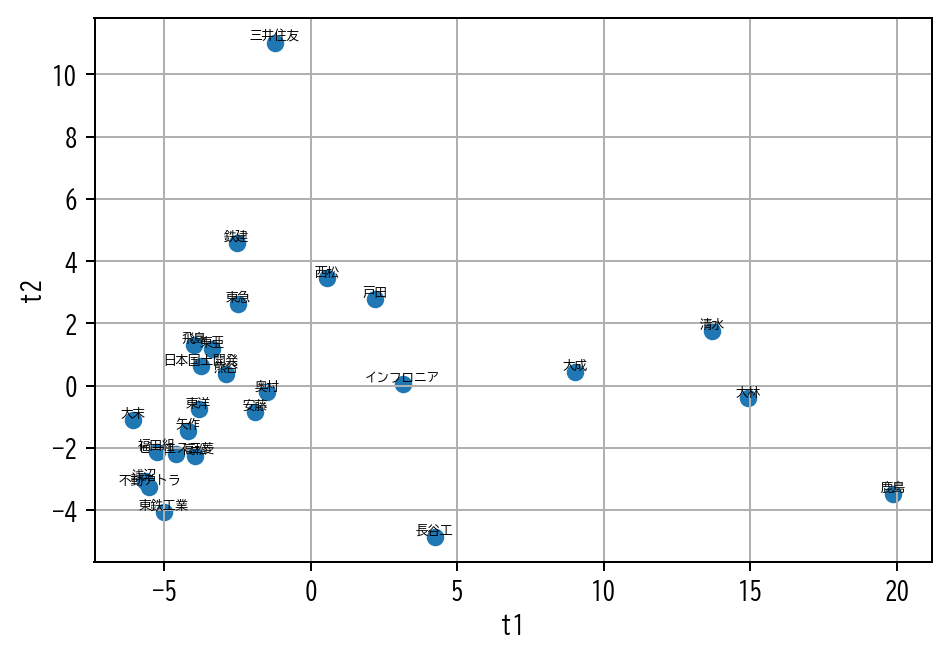

In [37]:
import matplotlib
matplotlib.rc('font', family='BIZ UDGothic')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df6)
X_scaled = scaler.transform(df6)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
import matplotlib
matplotlib.rc('font', family='BIZ UDGothic')
fig = plt.figure(dpi=180)
num = 26  # 可視化するデータ数を指定
score = pd.DataFrame(pca.transform(X_scaled), index=df6.index)
plt.scatter(score.iloc[:num,0], score.iloc[:num,1]) 
plt.rcParams["font.size"] = 5
# プロットしたデータにサンプル名をラベリング
for i in range(num):
    plt.text(score.iloc[i,0], score.iloc[i,1], score.index[i], horizontalalignment="center", verticalalignment="bottom")

plt.xlabel("t1")
plt.ylabel("t2")
plt.grid()
plt.show()

In [38]:
pca.explained_variance_ratio_

array([0.541, 0.12 ])

In [39]:
# 主成分負荷量を算出
df_pca = pd.DataFrame(pca.components_,
             columns = [df6.columns],
             index = ["主成分{}".format(x+1) for x in range(2)]).T
df_pca.nsmallest(10, '主成分2')

,主成分1,主成分2
総資本経常利益率,-0.007667,-0.297855
売上高経常利益率,-0.007667,-0.297855
売上高営業利益率,0.010675,-0.273005
自己資本経常利益率,0.015225,-0.270804
自己資本利益率、経営指標等,0.015371,-0.249982
売上高総利益率,-0.011290,-0.242556
総資本売上総利益率,-0.055608,-0.238531
自己資本比率、経営指標等,-0.059290,-0.236605
自己資本比率,-0.057249,-0.233949
流動比率,-0.067067,-0.202305


In [40]:
df_pca.nlargest(10, '主成分2')

,主成分1,主成分2
固定比率,0.088417,0.166658
負債回転期間,0.085888,0.159755
固定長期適合率,0.092267,0.122356
貸倒引当金の増減額（△は減少）、営業活動によるキャッシュ・フロー,0.057001,0.113192
株主数－金融商品取引業者,0.078956,0.076518
有形固定長期適合率,0.056475,0.074280
特別損失,0.041137,0.050655
配当金の支払額、財務活動によるキャッシュ・フロー,-0.135753,0.049839
株主数－個人その他,0.119896,0.049508
株主数－計,0.120508,0.048834


In [41]:
df_pca.nsmallest(10, '主成分1')

,主成分1,主成分2
配当金の支払額、財務活動によるキャッシュ・フロー,-0.135753,0.049839
利息の支払額、営業活動によるキャッシュ・フロー又は財務活動によるキャッシュ・フロー,-0.135746,-0.012271
受取利息及び受取配当金、営業活動によるキャッシュ・フロー,-0.134570,0.023253
投資活動によるキャッシュ・フロー、経営指標等,-0.129523,0.045108
その他有価証券評価差額金（税引後）、その他の包括利益,-0.098518,-0.022474
ROA,-0.081676,-0.140181
純支払い利息比率,-0.078384,0.009939
ROE,-0.078003,-0.144773
貸倒引当金、投資その他の資産、一括控除,-0.077020,-0.024394
総資産回転率,-0.076234,-0.058609


In [42]:
df_pca.nlargest(10, '主成分1')

,主成分1,主成分2
負債,0.145237,-0.003745
総資産額、経営指標等,0.144929,-0.015101
売上高、経営指標等,0.144469,-0.018004
販売費及び一般管理費,0.144336,-0.026810
流動資産,0.143827,-0.017694
流動負債,0.143558,-0.000005
固定資産,0.143547,-0.010827
純資産額、経営指標等,0.143483,-0.033198
利益剰余金,0.143345,-0.046933
株主資本,0.142871,-0.041937


In [43]:
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
scaler2.fit(df5)
X_scaled2 = scaler2.transform(df5)

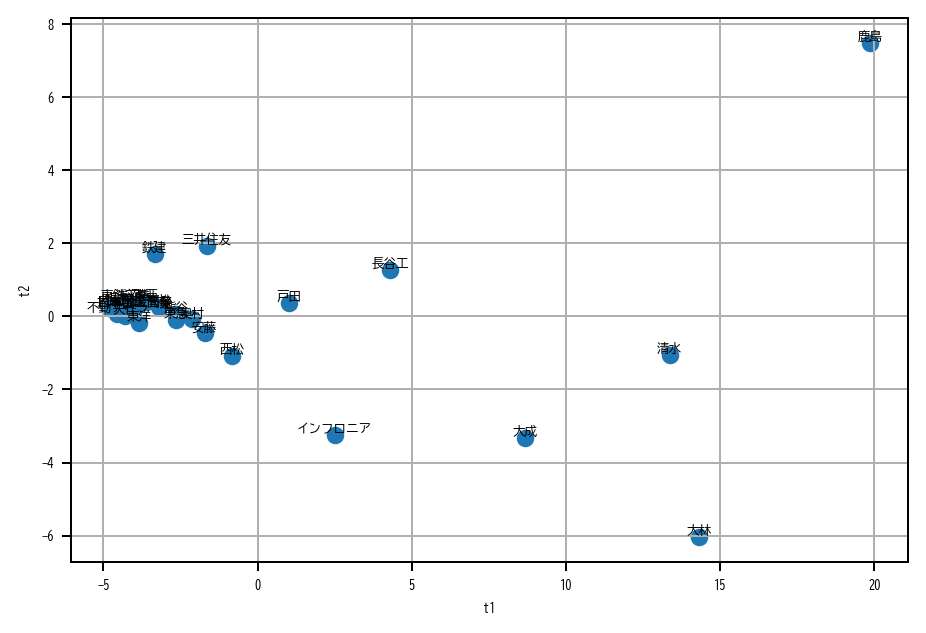

In [66]:

from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca2.fit(X_scaled2)
X_pca2 = pca2.transform(X_scaled2)
score2 = pd.DataFrame(pca2.transform(X_scaled2), index=df5.index)
fig = plt.figure(dpi=180)
num = 26  # 可視化するデータ数を指定
plt.scatter(score2.iloc[:num,0], score2.iloc[:num,1]) 
plt.rcParams["font.size"] = 5
# プロットしたデータにサンプル名をラベリング

for i in range(num):
    plt.text(score2.iloc[i,0], score2.iloc[i,1], score2.index[i], horizontalalignment="center", verticalalignment="bottom")

plt.xlabel("t1")
plt.ylabel("t2")
plt.grid()
plt.show()
fig.savefig('sample.png')

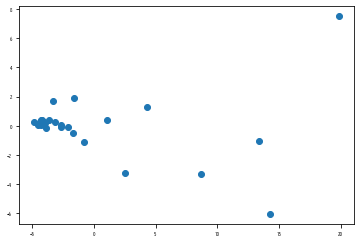

In [45]:
plt.scatter(X_pca2[:, 0], X_pca2[:, 1])


In [46]:
score = pd.DataFrame(pca.transform(X_scaled), index=df5.index)
score

,0,1
大成,9.020912,0.446199
清水,13.687807,1.751905
大林,14.915408,-0.415086
熊谷,-2.876092,0.371638
鹿島,19.879003,-3.473574
日本国土開発,-3.756614,0.613258
西松,0.569063,3.438501
飛島,-3.988442,1.303238
鉄建,-2.524800,4.581241
東亜,-3.371179,1.182213


In [47]:
import matplotlib
matplotlib.rc('font', family='BIZ UDGothic')

In [48]:
df5.index

Index(['大成', '清水', '大林', '熊谷', '鹿島', '日本国土開発', '西松', '飛島', '鉄建', '東亜', '東洋',
       '奥村', '三井住友', '長谷工', '大末', '不動テトラ', '東鉄工業', '浅沼', '戸田', '矢作', '福田組',
       '高松', '東急', '安藤', 'ピーエス三菱', 'インフロニア'],
      dtype='object')

In [49]:
pca2.explained_variance_

array([44.686,  5.033])

In [50]:
pca2.explained_variance_ratio_

array([0.661, 0.074])

In [51]:
# 主成分負荷量を算出
df_pca2 = pd.DataFrame(pca2.components_,
             columns = [df5.columns],
             index = ["主成分{}".format(x+1) for x in range(2)]).T

In [52]:
df_pca2.nlargest(10, '主成分1')

,主成分1,主成分2
項目名,,
売上高、経営指標等,0.151540,-0.016424
負債,0.151370,-0.037413
総資産額、経営指標等,0.151285,-0.045372
販売費及び一般管理費,0.151138,-0.020871
流動資産,0.150583,-0.025065
利益剰余金,0.150413,-0.030825
純資産額、経営指標等,0.150155,-0.057827
流動負債,0.149902,-0.040929
株主資本,0.149626,-0.054183


In [53]:
df_pca2.nsmallest(10, '主成分1')

,主成分1,主成分2
項目名,,
配当金の支払額、財務活動によるキャッシュ・フロー,-0.141308,0.040388
利息の支払額、営業活動によるキャッシュ・フロー又は財務活動によるキャッシュ・フロー,-0.141301,-0.058546
受取利息及び受取配当金、営業活動によるキャッシュ・フロー,-0.141250,-0.094400
投資活動によるキャッシュ・フロー、経営指標等,-0.135263,0.015854
その他有価証券評価差額金（税引後）、その他の包括利益,-0.101230,0.246907
貸倒引当金、投資その他の資産、一括控除,-0.079799,-0.178597
自己資本比率、経営指標等,-0.053961,-0.013480
１株当たり純資産額、経営指標等,-0.023754,0.009155
株価収益率、経営指標等,-0.007991,-0.110886


In [54]:
df_pca2.nlargest(10, '主成分2')

,主成分1,主成分2
項目名,,
貸倒引当金の増減額（△は減少）、営業活動によるキャッシュ・フロー,0.058375,0.299461
その他、営業活動によるキャッシュ・フロー,0.070605,0.297347
財務活動によるキャッシュ・フロー、経営指標等,0.068710,0.274670
受取利息、営業外収益,0.117172,0.247353
その他有価証券評価差額金（税引後）、その他の包括利益,-0.101230,0.246907
その他、営業外収益,0.132915,0.203429
完成工事補償引当金,0.110921,0.181039
営業外費用,0.137244,0.160507
その他、流動負債,0.138940,0.145239


In [55]:
df_pca2.nsmallest(10, '主成分2')

,主成分1,主成分2
項目名,,
営業活動によるキャッシュ・フロー、経営指標等,0.067017,-0.338833
小計、営業活動によるキャッシュ・フロー,0.091565,-0.305913
貸倒引当金、投資その他の資産、一括控除,-0.079799,-0.178597
現金及び現金同等物の増減額（△は減少）,0.062857,-0.152494
資本剰余金,0.084391,-0.150513
退職給付に係る調整累計額,0.042144,-0.146393
現金及び現金同等物の残高、経営指標等,0.139541,-0.126275
無形固定資産,0.047579,-0.122851
株価収益率、経営指標等,-0.007991,-0.110886


In [56]:
list_hukab1 = df_pca2.nlargest(10, '主成分1').reset_index().set_index('項目名').index
dfpca_b1 = df4.loc[list_hukab1.tolist()] 

list_hukas1 = df_pca2.nsmallest(10, '主成分1').reset_index().set_index('項目名').index
dfpca_s1 = df4.loc[list_hukas1.tolist()]

list_hukab2 = df_pca2.nlargest(10, '主成分2').reset_index().set_index('項目名').index
dfpca_b2 = df4.loc[list_hukab2.tolist()] 

list_hukas2 = df_pca2.nsmallest(10, '主成分2').reset_index().set_index('項目名').index
dfpca_s2 = df4.loc[list_hukas2.tolist()] 

In [57]:
dfpca_b1

,大成,清水,大林,熊谷,鹿島,日本国土開発,西松,飛島,鉄建,東亜,東洋,奥村,三井住友,長谷工,大末,不動テトラ,東鉄工業,浅沼,戸田,矢作,福田組,高松,東急,安藤,ピーエス三菱,インフロニア
項目名,,,,,,,,,,,,,,,,,,,,,,,,,,
売上高、経営指標等,1.642712e+12,1.933814e+12,1.983888e+12,4.035020e+11,2.391579e+12,1.542020e+11,3.397570e+11,1.259410e+11,1.607430e+11,2.135690e+11,1.683510e+11,2.494420e+11,4.586220e+11,1.027277e+12,7.183400e+10,7.046600e+10,1.246614e+11,1.444360e+11,5.471550e+11,9.309000e+10,1.543580e+11,2.824950e+11,2.888670e+11,3.721460e+11,1.096390e+11,7.096410e+11
負債,1.182773e+12,1.540732e+12,1.574048e+12,2.067890e+11,1.708572e+12,8.431000e+10,3.574750e+11,8.232500e+10,1.178520e+11,1.375670e+11,7.973300e+10,1.705110e+11,3.390150e+11,7.440160e+11,2.408800e+10,2.428000e+10,4.621051e+10,4.836700e+10,4.922950e+11,5.889100e+10,5.584700e+10,1.062040e+11,1.531440e+11,1.766890e+11,4.756700e+10,5.642480e+11
総資産額、経営指標等,2.016717e+12,2.448010e+12,2.609929e+12,3.766500e+11,2.769718e+12,1.623390e+11,5.136230e+11,1.280550e+11,1.833960e+11,2.269280e+11,1.537170e+11,3.437270e+11,4.101530e+11,1.198105e+12,4.562500e+10,5.612800e+10,1.497006e+11,9.303400e+10,8.155560e+11,1.164230e+11,1.343510e+11,2.339630e+11,2.491640e+11,3.180140e+11,9.310000e+10,9.265630e+11
販売費及び一般管理費,9.303200e+10,1.063540e+11,1.227690e+11,2.172800e+10,1.435730e+11,9.456000e+09,2.110400e+10,9.457000e+09,1.074000e+10,1.147500e+10,1.053100e+10,2.015300e+10,2.782800e+10,7.114700e+10,3.497000e+09,8.015000e+09,8.322383e+09,9.447000e+09,4.318800e+10,8.765000e+09,9.963000e+09,2.998300e+10,1.677100e+10,2.217000e+10,9.148000e+09,5.762800e+10
流動資産,1.353485e+12,1.453897e+12,1.505551e+12,2.982760e+11,1.751584e+12,1.146080e+11,2.907440e+11,1.006150e+11,1.161660e+11,1.755730e+11,1.150140e+11,1.988550e+11,3.364050e+11,8.691990e+11,3.952300e+10,4.287600e+10,1.125339e+11,7.671900e+10,4.315730e+11,8.043500e+10,9.908300e+10,1.687090e+11,1.878920e+11,2.453790e+11,7.074600e+10,4.747320e+11
利益剰余金,5.627740e+11,6.253240e+11,7.280870e+11,1.174980e+11,8.136530e+11,5.744100e+10,1.573260e+11,3.369800e+10,3.056300e+10,4.660200e+10,4.870100e+10,1.038270e+11,5.688600e+10,4.278780e+11,1.658200e+10,1.306000e+10,9.787855e+10,3.091900e+10,2.009960e+11,4.912400e+10,6.825000e+10,1.212330e+11,7.011200e+10,1.226560e+11,3.100400e+10,2.341290e+11
純資産額、経営指標等,8.339440e+11,9.072770e+11,1.035881e+12,1.698600e+11,1.061145e+12,7.802900e+10,1.561480e+11,4.573000e+10,6.554300e+10,8.936100e+10,7.398400e+10,1.732150e+11,7.113700e+10,4.540880e+11,2.153600e+10,3.184800e+10,1.034901e+11,4.466700e+10,3.232610e+11,5.753200e+10,7.850400e+10,1.277590e+11,9.602000e+10,1.413240e+11,4.553300e+10,3.623150e+11
流動負債,1.022652e+12,1.086086e+12,1.226434e+12,1.709220e+11,1.319768e+12,5.675200e+10,2.476700e+11,7.419500e+10,1.018100e+11,1.222490e+11,7.023500e+10,1.290480e+11,2.440270e+11,3.788020e+11,2.198200e+10,2.275500e+10,4.338324e+10,3.519000e+10,3.100160e+11,4.514800e+10,4.865200e+10,7.707500e+10,1.447430e+11,1.642170e+11,3.736900e+10,2.982730e+11
株主資本,7.149920e+11,7.020810e+11,8.250470e+11,1.641130e+11,8.814170e+11,7.615200e+10,1.442940e+11,4.487800e+10,5.393900e+10,8.231900e+10,6.868000e+10,1.447200e+11,6.574800e+10,4.551210e+11,2.079800e+10,3.119800e+10,9.976889e+10,4.264600e+10,2.431590e+11,6.227900e+10,7.732900e+10,1.270300e+11,8.954100e+10,1.356140e+11,4.293800e+10,3.421890e+11


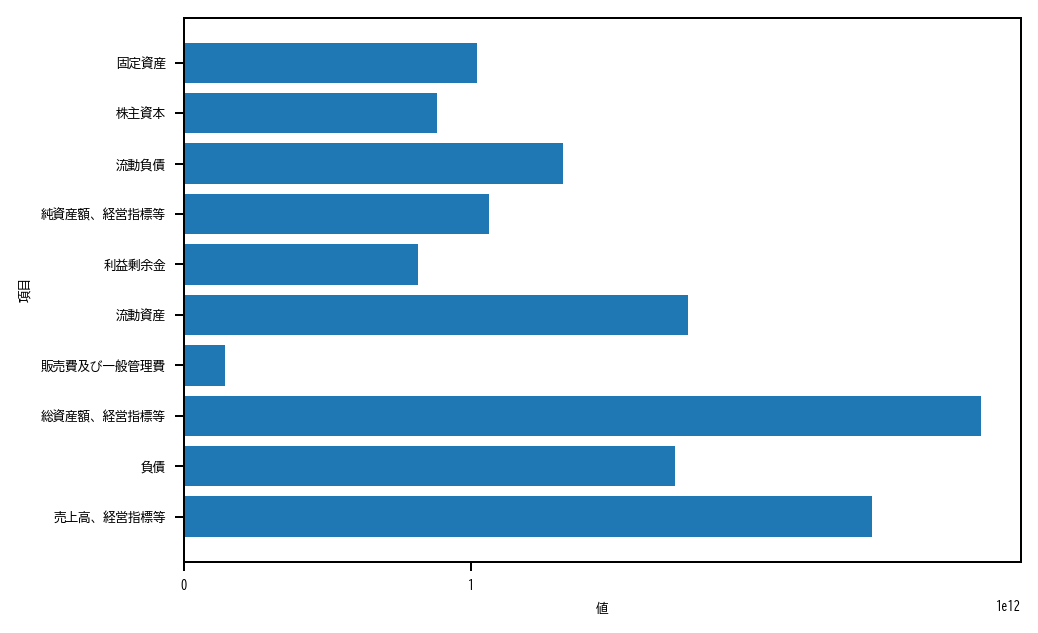

In [58]:
fig = plt.figure(dpi=180)

plt.rcParams["font.size"] = 5

x = dfpca_b1['鹿島']


plt.barh(range(10), x, align='center')
plt.yticks(np.arange(10),list_hukab1)
plt.xticks([0, 1000000000000])
plt.xlabel("値")
plt.ylabel("項目")
plt.show()

In [59]:
dfpca_b2['清水']

項目名
貸倒引当金の増減額（△は減少）、営業活動によるキャッシュ・フロー    1.960000e+08
その他、営業活動によるキャッシュ・フロー                8.412000e+09
財務活動によるキャッシュ・フロー、経営指標等              6.563500e+10
受取利息、営業外収益                          9.550000e+08
その他有価証券評価差額金（税引後）、その他の包括利益         -1.032100e+10
その他、営業外収益                           2.835000e+09
完成工事補償引当金                           4.117000e+09
営業外費用                               6.882000e+09
その他、流動負債                            6.030300e+10
短期借入金                               2.256550e+11
Name: 清水, dtype: float64

In [60]:
dfpca_b1['鹿島'].index

Index(['売上高、経営指標等', '負債', '総資産額、経営指標等', '販売費及び一般管理費', '流動資産', '利益剰余金',
       '純資産額、経営指標等', '流動負債', '株主資本', '固定資産'],
      dtype='object', name='項目名')

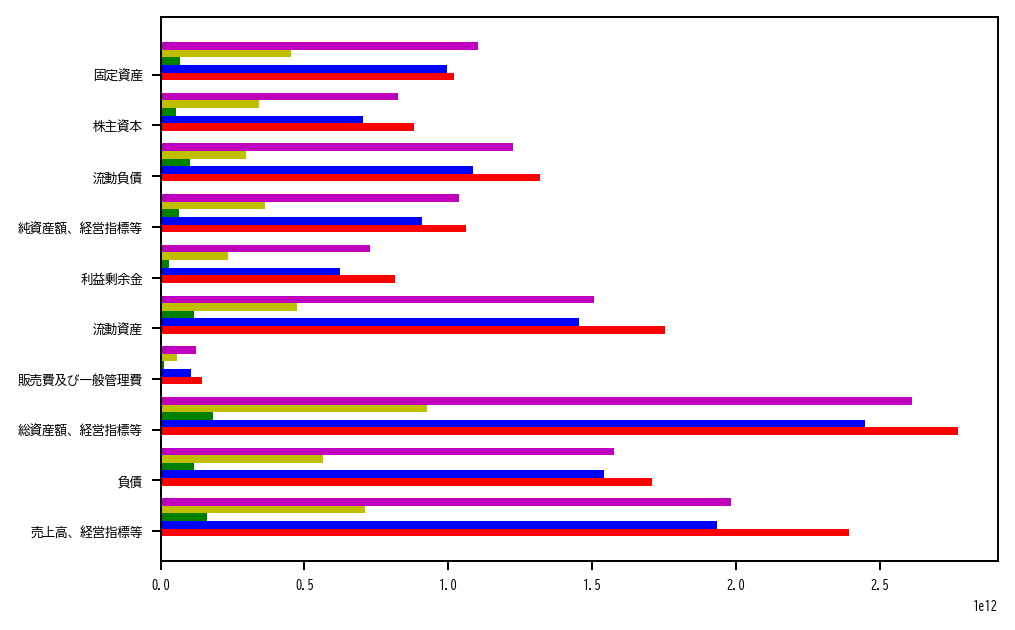

In [61]:
fig = plt.figure(dpi=180)
import matplotlib.pyplot as plt
import numpy as np

# 各系列のデータを用意
height1 = dfpca_b1['鹿島']
height2 = dfpca_b1['清水']
height3 = dfpca_b1['鉄建']
height4 = dfpca_b1['インフロニア']
height5 = dfpca_b1['大林']

left = np.arange(len(height1))  # numpyで横軸を設定
labels = ['売上高、経営指標等', '負債', '総資産額、経営指標等', '販売費及び一般管理費', '流動資産', '利益剰余金',
       '純資産額、経営指標等', '流動負債', '株主資本', '固定資産']

height = 0.15

plt.barh(left, height1, color='r', height=height, align='center')
plt.barh(left+height, height2, color='b', height=height, align='center')
plt.barh(left+height*2, height3, color='g', height=height, align='center')
plt.barh(left+height*3, height4, color='y', height=height, align='center')
plt.barh(left+height*4, height5, color='m', height=height, align='center')

plt.yticks(left + height/5, labels)
plt.show()

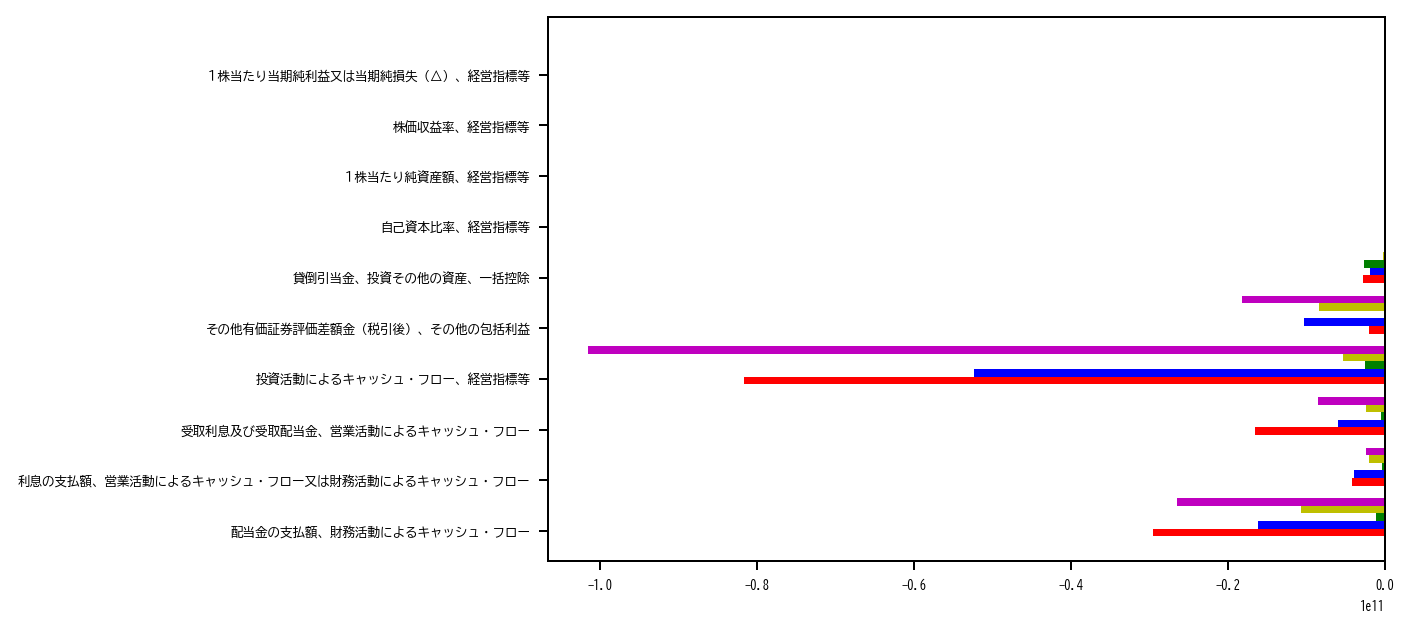

In [62]:
fig = plt.figure(dpi=180)
import matplotlib.pyplot as plt
import numpy as np

# 各系列のデータを用意
height1 = dfpca_s1['鹿島']
height2 = dfpca_s1['清水']
height3 = dfpca_s1['鉄建']
height4 = dfpca_s1['インフロニア']
height5 = dfpca_s1['大林']

left = np.arange(len(height1))  # numpyで横軸を設定
labels = dfpca_s1.index

height = 0.15

plt.barh(left, height1, color='r', height=height, align='center')
plt.barh(left+height, height2, color='b', height=height, align='center')
plt.barh(left+height*2, height3, color='g', height=height, align='center')
plt.barh(left+height*3, height4, color='y', height=height, align='center')
plt.barh(left+height*4, height5, color='m', height=height, align='center')



plt.yticks(left + height/5, labels)
plt.show()

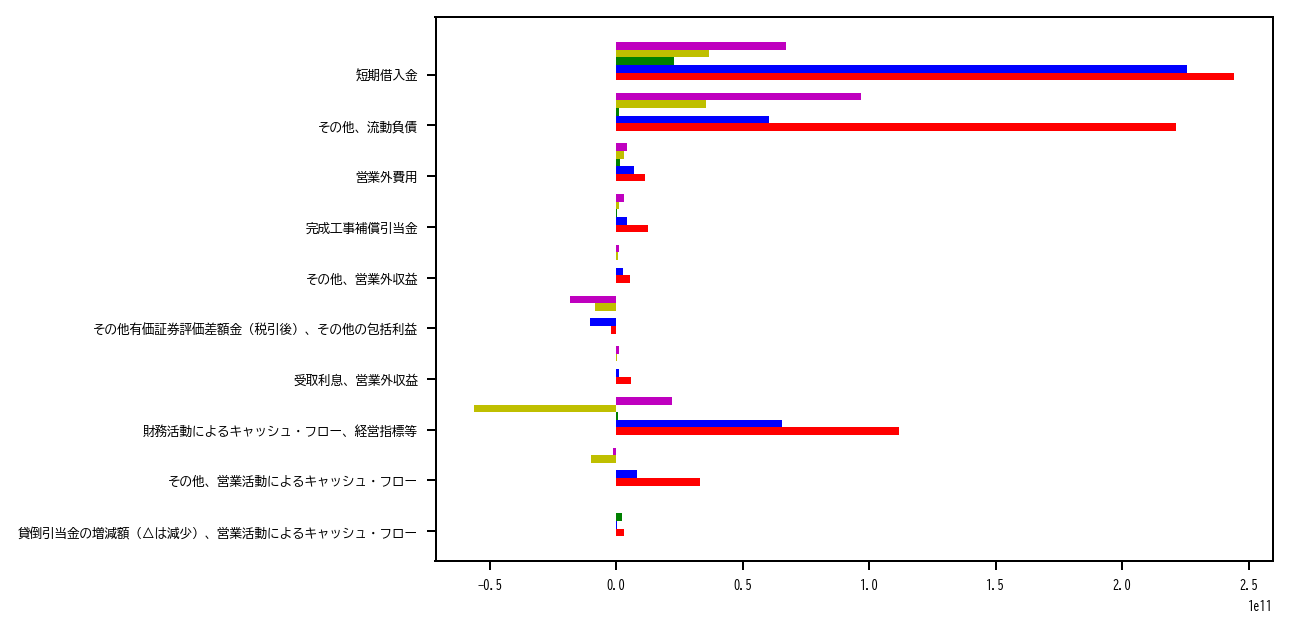

In [63]:
fig = plt.figure(dpi=180)
import matplotlib.pyplot as plt
import numpy as np

# 各系列のデータを用意
height1 = dfpca_b2['鹿島']
height2 = dfpca_b2['清水']
height3 = dfpca_b2['鉄建']
height4 = dfpca_b2['インフロニア']
height5 = dfpca_b2['大林']



left = np.arange(len(height1))  # numpyで横軸を設定
labels = dfpca_b2.index

height = 0.15

plt.barh(left, height1, color='r', height=height, align='center')
plt.barh(left+height, height2, color='b', height=height, align='center')
plt.barh(left+height*2, height3, color='g', height=height, align='center')
plt.barh(left+height*3, height4, color='y', height=height, align='center')
plt.barh(left+height*4, height5, color='m', height=height, align='center')

plt.yticks(left + height/5, labels)
plt.show()

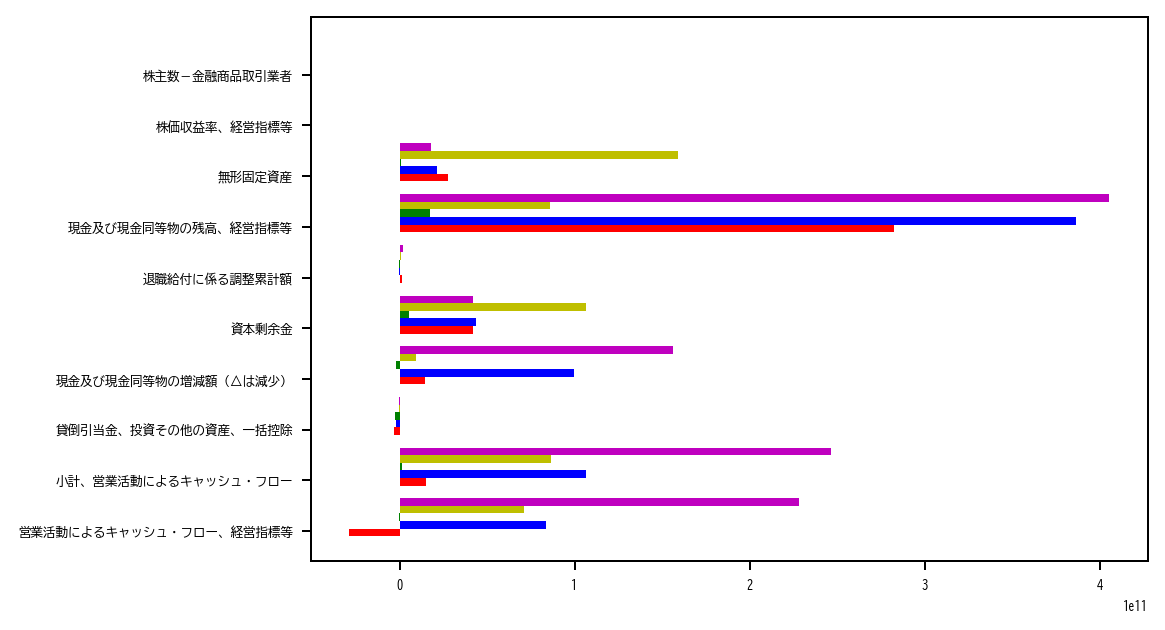

In [64]:
fig = plt.figure(dpi=180)
import matplotlib.pyplot as plt
import numpy as np

# 各系列のデータを用意
height1 = dfpca_s2['鹿島']
height2 = dfpca_s2['清水']
height3 = dfpca_s2['鉄建']
height4 = dfpca_s2['インフロニア']
height5 = dfpca_s2['大林']

left = np.arange(len(height1))  # numpyで横軸を設定
labels = dfpca_s2.index

height = 0.15

plt.barh(left, height1, color='r', height=height, align='center')
plt.barh(left+height, height2, color='b', height=height, align='center')
plt.barh(left+height*2, height3, color='g', height=height, align='center')
plt.barh(left+height*3, height4, color='y', height=height, align='center')
plt.barh(left+height*4, height5, color='m', height=height, align='center')

plt.yticks(left + height/5, labels)
plt.show()

In [44]:
df6

,売上高、経営指標等,経常利益又は経常損失（△）、経営指標等,包括利益、経営指標等,純資産額、経営指標等,総資産額、経営指標等,１株当たり純資産額、経営指標等,１株当たり当期純利益又は当期純損失（△）、経営指標等,自己資本比率、経営指標等,自己資本利益率、経営指標等,株価収益率、経営指標等,営業活動によるキャッシュ・フロー、経営指標等,投資活動によるキャッシュ・フロー、経営指標等,財務活動によるキャッシュ・フロー、経営指標等,現金及び現金同等物の残高、経営指標等,従業員数,１単元の株式数,株主数－金融機関,株主数－金融商品取引業者,株主数－その他の法人,株主数－外国法人等－個人以外,株主数－個人その他,株主数－計,その他、流動資産,流動資産,土地,有形固定資産,無形固定資産,投資有価証券,その他、投資その他の資産,貸倒引当金、投資その他の資産、一括控除,投資その他の資産,固定資産,短期借入金,完成工事補償引当金,その他、流動負債,流動負債,固定負債,負債,資本金,資本剰余金,利益剰余金,株主資本,その他有価証券評価差額金,退職給付に係る調整累計額,評価・換算差額等,販売費及び一般管理費,営業利益又は営業損失（△）,受取利息、営業外収益,受取配当金、営業外収益,その他、営業外収益,支払利息、営業外費用,営業外費用,特別損失,税引前当期純利益又は税引前当期純損失（△）,法人税、住民税及び事業税,法人税等,その他有価証券評価差額金（税引後）、その他の包括利益,貸倒引当金の増減額（△は減少）、営業活動によるキャッシュ・フロー,受取利息及び受取配当金、営業活動によるキャッシュ・フロー,仕入債務の増減額（△は減少）、営業活動によるキャッシュ・フロー,その他、営業活動によるキャッシュ・フロー,小計、営業活動によるキャッシュ・フロー,利息の支払額、営業活動によるキャッシュ・フロー又は財務活動によるキャッシュ・フロー,配当金の支払額、財務活動によるキャッシュ・フロー,現金及び現金同等物の増減額（△は減少）,連結子会社の数,自己資本比率,売上高総利益率,売上高営業利益率,ROA,ROE,総資産回転率,流動比率,固定比率,固定長期適合率,一人あたり売上高,総資本経常利益率,自己資本経常利益率,総資本売上総利益率,売上高経常利益率,自己資本回転率,固定資産回転率,運転資本保有月数,純支払い利息比率,負債回転期間,1人あたりの売上総利益,有形固定長期適合率
大成,1.642712e+12,6.312500e+10,3.660000e+10,8.339440e+11,2.016717e+12,4402.01,241.24,0.4110,0.0560,17.00,3.010100e+10,-1.405800e+10,-9.866800e+10,4.158630e+11,14466.0,100.0,103.0,40.0,769.0,665.0,55811.0,57413.0,4.584700e+10,1.353485e+12,1.204880e+11,2.133490e+11,1.758100e+10,3.869060e+11,3.057000e+10,-1.969000e+09,4.323000e+11,6.632320e+11,8.196500e+10,3.325000e+09,6.076700e+10,1.022652e+12,1.601200e+11,1.182773e+12,1.227420e+11,3.038200e+10,5.627740e+11,7.149920e+11,9.709000e+10,1.563800e+10,1.141940e+11,9.303200e+10,5.474000e+10,5.430000e+08,5.366000e+09,7.210000e+08,8.610000e+08,1.325000e+09,1.597000e+09,6.809400e+10,2.836900e+10,2.073800e+10,-4.470000e+08,1.830000e+08,-5.909000e+09,5.238400e+10,-7.058000e+09,5.449100e+10,-8.790000e+08,-2.572200e+10,-8.089600e+10,45.0,0.413516,0.089956,0.033323,1.196202e-10,2.892760e-10,0.814548,1.323505,0.795296,0.667192,1.135568e+08,0.031301,0.075695,0.073274,0.031301,0.814548,2.476829,0.016783,-0.307297,0.060001,1.021513e+07,0.214623
清水,1.933814e+12,5.654600e+10,4.495600e+10,9.072770e+11,2.448010e+12,1150.70,66.29,0.3480,0.0590,11.30,8.384200e+10,-5.243400e+10,6.563500e+10,3.867500e+11,19869.0,100.0,95.0,39.0,575.0,599.0,51731.0,53114.0,1.564230e+11,1.453897e+12,2.949490e+11,6.352470e+11,2.146500e+10,3.129680e+11,1.711800e+10,-1.875000e+09,3.373990e+11,9.941120e+11,2.256550e+11,4.117000e+09,6.030300e+10,1.086086e+12,4.546460e+11,1.540732e+12,7.436500e+10,4.369100e+10,6.253240e+11,7.020810e+11,1.219370e+11,-5.550000e+08,1.504770e+11,1.063540e+11,5.464700e+10,9.550000e+08,4.990000e+09,2.835000e+09,3.997000e+09,6.882000e+09,5.560000e+08,7.534400e+10,3.020000e+10,2.385400e+10,-1.032100e+10,1.960000e+08,-5.946000e+09,9.788400e+10,8.412000e+09,1.066400e+11,-3.892000e+09,-1.623700e+10,9.961500e+10,125.0,0.370618,0.083256,0.028259,2.707914e-11,7.306479e-11,0.789953,1.338657,1.095709,0.729933,9.732820e+07,0.023099,0.062325,0.065768,0.023099,0.789953,1.945268,0.015850,-0.100734,0.066394,8.103125e+06,0.466434
大林,1.983888e+12,1.008020e+11,7.424400e+10,1.035881e+12,2.609929e+12,1390.77,108.34,0.3820,0.0800,9.40,2.284560e+11,-1.016100e+11,2.211800e+10,4.056330e+11,15876.0,100.0,107.0,44.0,533.0,675.0,53211.0,54605.0,2.557200e+10,1.505551e+12,4.080310e+11,6.925450e+11,1.793200e+10,3.065700e+11,7.814800e+10,-1.700000e+08,3.938990e+11,1.104377e+12,6.717000e+10,3.004000e+09,9.691900e+10,1.226434e+12,3.476130e+11,1.574048e+12,5.775200e+10,4.196200e+10,7.280870e+11,8.250470e+11,1.180570e+11,1.808000e+09,1.720610e+11,1.227690e+11,9.380000e+10,1.125000e+09,7.377000e+09,1.031000e+09,2.485000e+09,4.382000e+09,1.732000e+09,1.137060e+11,3.553300e+10,3.384800e+10,-1.816700e+10,-2.400000e+07,-8.503000e+09,2.925700e+10,-1.449000e+09,2.465830e+11,-2.438000e+09,-2.656700e+10,1.563160e+11,108.0,0.396900,0.109164,0.047281,4.151071e-11,1.045873e-10,0.760131,1.227584,1.066123,0.798252,1.249615e+08,0.038623,0.097310,0.082979,0.038623,0.760131,1.796387,0.011724,-0.303293,0.066118,1.364128e+07,0.500577
熊谷,4.0350

Text(0, 0.5, '項目')

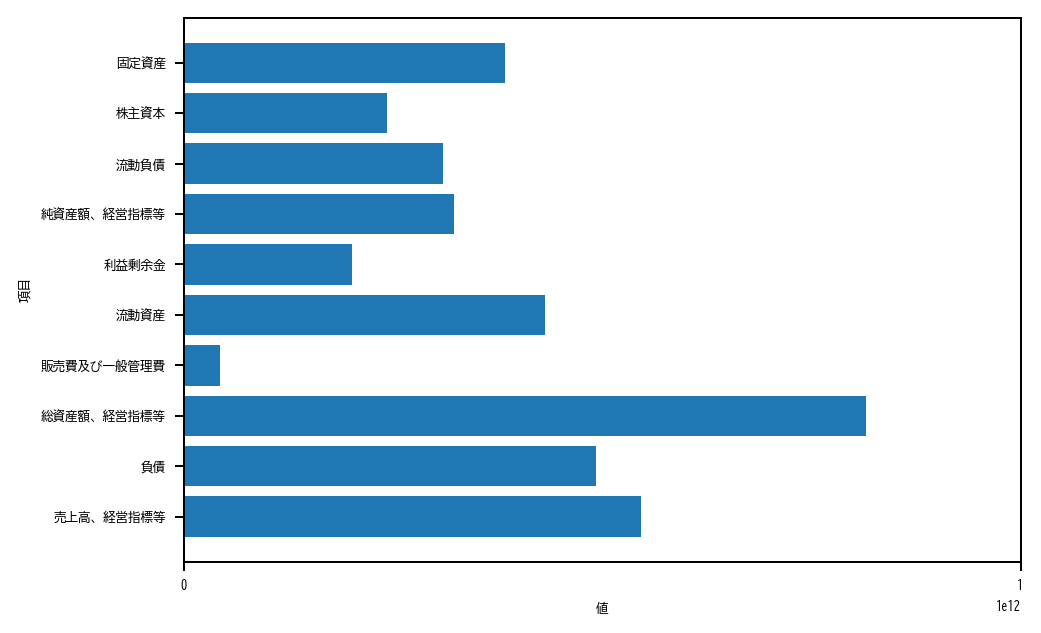

In [140]:
fig = plt.figure(dpi=180)

plt.rcParams["font.size"] = 5

x = dfpca['戸田']
plt.barh(range(10), x, align='center')
plt.yticks(np.arange(10),list_huka)
plt.xticks([0, 1000000000000])
plt.xlabel("値")
plt.ylabel("項目")

In [67]:
from factor_analyzer import FactorAnalyzer

In [68]:
#データの標準化
dfzaimu_std = df_zaimu_rate.apply(lambda x: (x-x.mean())/x.std(), axis=0)
dfzaimu_std

,自己資本比率,売上高総利益率,売上高営業利益率,ROA,ROE,総資産回転率,流動比率,固定比率,固定長期適合率,一人あたり売上高,総資本経常利益率,自己資本経常利益率,総資本売上総利益率,売上高経常利益率,自己資本回転率,固定資産回転率,運転資本保有月数,純支払い利息比率,負債回転期間,1人あたりの売上総利益,有形固定長期適合率
大成,-0.242724,-0.559866,-0.245903,-0.748338,-0.715010,-0.730316,-0.862160,0.227716,0.760120,0.791903,-0.319424,-0.062277,-0.813513,-0.319424,-0.730316,-0.634000,-0.592002,-1.196812,0.603348,-0.019360,-0.723573
清水,-0.668374,-0.762113,-0.455698,-0.843427,-0.824616,-0.830850,-0.822946,1.187850,1.123478,0.057780,-0.653279,-0.232103,-0.995764,-0.653279,-0.830850,-0.858926,-0.698864,-0.037361,0.998811,-0.600203,1.397273
大林,-0.407592,0.019907,0.332323,-0.828598,-0.808636,-0.952755,-1.110397,1.093292,1.519149,1.307811,-0.021408,0.212297,-0.577843,-0.021408,-0.952755,-0.921924,-1.171461,-1.174340,0.981713,0.922904,1.684838
熊谷,0.128974,-0.790751,-0.447426,-0.381181,-0.325530,0.319180,0.228902,-0.839417,-0.897581,-0.202243,-0.271170,-0.108752,-0.451675,-0.271170,0.319180,0.496463,0.498401,-0.367797,-0.466365,-0.755713,-1.331311
鹿島,-0.544287,0.095947,0.513335,-0.786674,-0.752743,-0.530320,-0.852621,0.752412,0.962781,1.232775,0.709824,0.852366,-0.251083,0.709824,-0.530320,-0.688096,-0.790915,-2.218407,0.574482,0.958532,0.248500
日本国土開発,0.423463,-0.545853,-0.420919,-0.624717,-0.608606,-0.177130,0.938910,-0.359036,-0.485850,2.031189,-0.430336,-0.268594,-0.507198,-0.430336,-0.177130,-0.315027,1.067093,0.506221,-0.289745,0.676400,-0.159731
西松,-1.329266,-0.279504,-0.088213,-0.382257,-0.068109,-1.355968,-1.249284,2.247790,1.749570,0.456436,-0.549310,0.048068,-0.998649,-0.549310,-1.355968,-1.037009,-1.304274,0.618926,2.315366,0.068309,2.642489
飛島,-0.802388,-0.014896,-0.262588,0.403057,0.898823,-0.039722,-0.777835,-0.396317,-0.153276,-0.347021,-0.424710,-0.002421,-0.013300,-0.424710,-0.039722,0.260040,-0.511946,1.423897,0.261389,-0.203393,0.305180
鉄建,-0.799680,-1.026839,-1.308584,-0.003717,0.335942,-0.477152,-1.334451,0.964221,1.668548,-0.640752,-1.379304,-0.836762,-1.007497,-1.379304,-0.477152,-0.670342,-1.661946,-0.121440,0.671175,-1.151286,0.851059
東亜,-0.438495,-0.726898,-0.354866,0.145508,0.412197,-0.212879,-0.570534,-0.477344,-0.262612,0.802097,-0.407143,-0.083619,-0.663472,-0.407143,-0.212879,0.077663,-0.131068,0.399279,0.212203,-0.186949,0.333323


In [69]:
dfzaimu_std_corr = dfzaimu_std.corr()

#固有値を求める
ev = np.linalg.eigvals(dfzaimu_std_corr)
ev_sorted = sorted(ev,reverse=True)

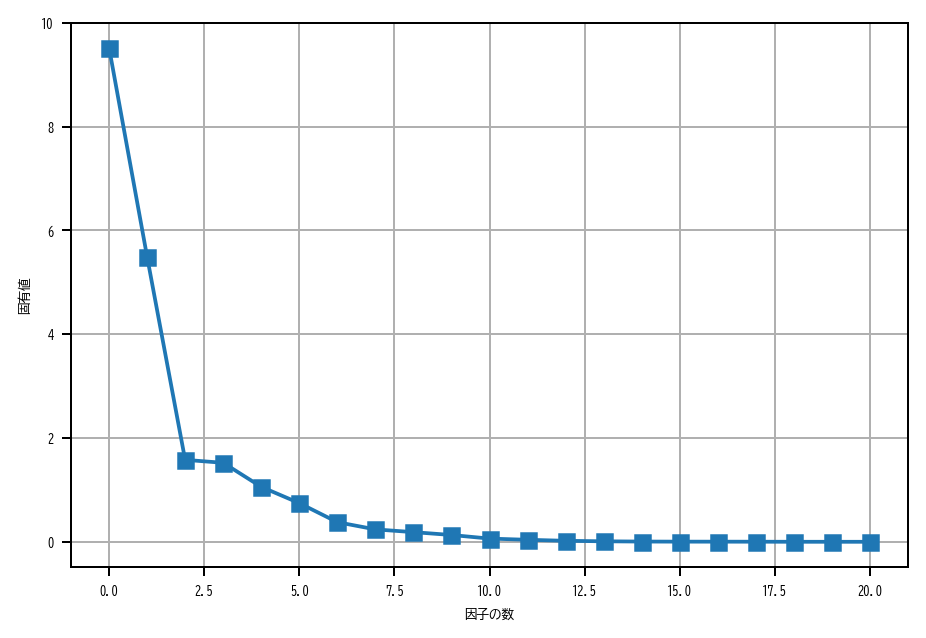

In [70]:
fig = plt.figure(dpi=180)
#スクリープロットの描画
#固有値をプロット
plt.plot(ev_sorted, 's-') 

# 軸名を指定
plt.xlabel("因子の数")
plt.ylabel("固有値")

plt.grid()
plt.show()

#### 

df4

In [71]:
fa = FactorAnalyzer(n_factors=4, rotation="promax")
fa.fit(dfzaimu_std)

FactorAnalyzer(n_factors=4, rotation_kwargs={})

In [72]:
# 因子負荷量，共通性の表示
loadings_df = pd.DataFrame(fa.loadings_, columns=["第１因子", "第２因子","第3因子","第4因子"]) #fa.loadingsで因子負荷量を算出
loadings_df.index = dfzaimu_std.columns
loadings_df["共通性"] = fa.get_communalities() #共通性の算出
loadings_df

,第１因子,第２因子,第3因子,第4因子,共通性
自己資本比率,0.362114,-0.096643,-0.538032,0.348432,0.551351
売上高総利益率,0.783666,-0.367609,-0.186354,0.220839,0.832766
売上高営業利益率,0.952881,-0.225959,0.130087,0.187174,1.010997
ROA,0.162599,0.355636,-0.591027,-0.137805,0.521218
ROE,0.294947,0.369886,-0.495636,-0.273420,0.544223
総資産回転率,-0.032776,1.028194,-0.012067,-0.205922,1.100806
流動比率,0.143363,0.212854,-0.150715,0.706984,0.588401
固定比率,-0.133251,-0.678446,0.112206,-0.251571,0.553924
固定長期適合率,0.073866,-0.815718,-0.070099,-0.463491,0.890589
一人あたり売上高,0.317004,0.217600,0.904405,-0.143582,0.986406


In [74]:

#文字列’か’を含む行を抽出
df_in = loadings_df[loadings_df.applymap(lambda x: x > 0.7 or x < -0.7).any(axis=1)]

#文字列'か'を含むセルの背景を黄色にする
styler = df_in.style.applymap(lambda x: 'background-color: yellow' if x > 0.7 or x < -0.7 else '')

styler

,第１因子,第２因子,第3因子,第4因子,共通性
売上高総利益率,0.783666,-0.367609,-0.186354,0.220839,0.832766
売上高営業利益率,0.952881,-0.225959,0.130087,0.187174,1.010997
総資産回転率,-0.032776,1.028194,-0.012067,-0.205922,1.100806
流動比率,0.143363,0.212854,-0.150715,0.706984,0.588401
固定長期適合率,0.073866,-0.815718,-0.070099,-0.463491,0.890589
一人あたり売上高,0.317004,0.217600,0.904405,-0.143582,0.986406
総資本経常利益率,0.975352,0.096621,0.064885,0.022888,0.965381
自己資本経常利益率,1.073677,0.002694,0.172629,-0.216014,1.229252
売上高経常利益率,0.975352,0.096621,0.064885,0.022888,0.965381
自己資本回転率,-0.032776,1.028194,-0.012067,-0.205922,1.100806


In [82]:
str(df_zaimu_rate.columns).replace("'", '')

'Index([自己資本比率, 売上高総利益率, 売上高営業利益率, ROA, ROE, 総資産回転率, 流動比率, 固定比率,\n       固定長期適合率, 一人あたり売上高, 総資本経常利益率, 自己資本経常利益率, 総資本売上総利益率, 売上高経常利益率,\n       自己資本回転率, 固定資産回転率, 運転資本保有月数, 純支払い利息比率, 負債回転期間, 1人あたりの売上総利益,\n       有形固定長期適合率],\n      dtype=object)'

In [39]:

import numpy as np
import statsmodels.api as sm


X = df6.drop('営業利益又は営業損失（△）', axis=1)
y = df6['営業利益又は営業損失（△）']


In [43]:
# Fit and summary:
model = sm.OLS(y, sm.add_constant(X))
res = model.fit()
res.summary()


C:\Users\Eri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Eri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1795: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\Users\Eri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          営業利益又は営業損失（△）   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 03 Apr 2024   Prob (F-statistic):                nan
Time:                        22:35:10   Log-Likelihood:                 189.77
No. Observations:                  26   AIC:                            -327.5
Df Residuals:                       0   BIC:                            -294.8
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
売上高、経営指標等                                    -0.0197        inf         -0        nan         nan         nan
経常利益又は経常損失（△）、経営指標等                           0.3880        inf          0        nan         nan         nan
包括利益、経営指標等                                    0.3116        inf          0        nan         nan         nan
純資産額、経営指標等                                    0.0038        inf          0        nan         nan         nan
総資産額、経営指標等                                    0.0102        inf          0        nan         nan         nan
１株当たり純資産額、経営指標等                            1.512e-07        inf          0        nan         nan         nan
１株当たり当期純利益又は当期純損失（△）、経営指標等                 7.465e-09        inf          0        nan         nan         nan
自己資本比率、経営指標等                              -9.532e-11        inf         -0        nan         nan         nan
自己資本利益率、経営指標等                              -3.97e-12        inf         -0        nan         nan         nan
株価収益率、経営指標等                               -1.736e-09        inf         -0        nan         nan         nan
営業活動によるキャッシュ・フロー、経営指標等                       -0.0358        inf         -0        nan         nan         nan
投資活動によるキャッシュ・フロー、経営指標等                        0.0136        inf          0        nan         nan         nan
財務活動によるキャッシュ・フロー、経営指標等                        0.0246        inf          0        nan         nan         nan
現金及び現金同等物の残高、経営指標等                            0.0457        inf          0        nan         nan         nan
従業員数                                       9.589e-08        inf          0        nan         nan         nan
１単元の株式数                                   -1.837e-08        inf         -0        nan         nan         nan
株主数－金融機関                                  -2.476e-09        inf         -0        nan         nan         nan
株主数－金融商品取引業者                              -5.783e-09        inf         -0        nan         nan         nan
株主数－その他の法人                                 1.099e-08        inf          0        nan         nan         nan
株主数－外国法人等－個人以外                            -1.518e-08        inf         -0        nan         nan         nan
株主数－個人その他                                 -1.189e-06        inf         -0        nan         nan         nan
株主数－計                                     -1.207e-06        inf         -0        nan         nan         nan
その他、流動資産                                     -0.0848        inf         -0        nan         nan         nan
流動資産                                          0.0294        inf          0        nan         nan         nan
土地                                            0.0097        inf          0        nan         nan         nan
有形固

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
import numpy as np

#統計検定である"alcohol"を除いたデータセットと、アルコールだけのデータセットを作成
df_X = df6.drop('営業利益又は営業損失（△）', axis=1)
df_y = df6['営業利益又は営業損失（△）']

#回帰
model = LinearRegression()
model.fit(df_X, df_y)


#偏回帰係数
print(pd.DataFrame({"Name":df6.columns,\
        "Coefficients":model.coef_[0]}).sort_values(by='Coefficients').round(4))

model.intercept_

                                         Name  Coefficients
0                                   売上高、経営指標等       -0.0243
62  利息の支払額、営業活動によるキャッシュ・フロー又は財務活動によるキャッシュ・フロー       -0.0243
61                        小計、営業活動によるキャッシュ・フロー       -0.0243
60                       その他、営業活動によるキャッシュ・フロー       -0.0243
59            仕入債務の増減額（△は減少）、営業活動によるキャッシュ・フロー       -0.0243
58               受取利息及び受取配当金、営業活動によるキャッシュ・フロー       -0.0243
57           貸倒引当金の増減額（△は減少）、営業活動によるキャッシュ・フロー       -0.0243
56                 その他有価証券評価差額金（税引後）、その他の包括利益       -0.0243
55                                       法人税等       -0.0243
63                   配当金の支払額、財務活動によるキャッシュ・フロー       -0.0243
54                               法人税、住民税及び事業税       -0.0243
52                                       特別損失       -0.0243
51                                      営業外費用       -0.0243
50                                 支払利息、営業外費用       -0.0243
49                                  その他、営業外収益       -0.0243
48                                受取配当金、

-168876908.006

In [ ]:
#予測実測プロットの作成
plt.figure(figsize=(6,6))
plt.scatter(df_y, pred_y,color='blue',alpha=0.3)
y_max_ = max(df_y.max(), pred_y.max())
y_min_ = min(df_y.min(), pred_y.min())
y_max = y_max_ + (y_max_ - y_min_) * 0.1
y_min = y_min_ - (y_max_ - y_min_) * 0.1

plt.plot([y_min , y_max],[y_min, y_max], 'k-')

plt.ylim(y_min, y_max)
plt.xlim(y_min, y_max)
plt.xlabel('alcohol(observed)',fontsize=20)
plt.ylabel('alcohol(predicted)',fontsize=20)
plt.legend(loc='best',fontsize=15)
plt.title('yyplot(alcohol)',fontsize=20)
plt.savefig('yyplot.png')
plt.show()

print('回帰係数：',round(model.intercept_,3))
"""output
回帰係数： 11.072
"""

In [ ]:
#回帰係数を格納したpandasDataFrameの表示
df_coef =  pd.DataFrame({'coefficient':model.coef_.flatten()}, index=df_X.columns)

#グラフの作成
x_pos = np.arange(len(df_coef))

fig = plt.figure(figsize=(6,6))
ax1 = fig.add_subplot(1, 1, 1)
ax1.barh(x_pos, df_coef['coefficient'], color='b')
ax1.set_title('coefficient of variables',fontsize=18)
ax1.set_yticks(x_pos)
ax1.set_yticks(np.arange(-1,len(df_coef.index))+0.5, minor=True)
ax1.set_yticklabels(df_coef.index, fontsize=14)
ax1.set_xticks(np.arange(-3,4,2)/10)
ax1.set_xticklabels(np.arange(-3,4,2)/10,fontsize=12)
ax1.grid(which='minor',axis='y',color='black',linestyle='-', linewidth=1)
ax1.grid(which='major',axis='x',linestyle='--', linewidth=1)
plt.savefig('coef_sklearn.png',bbox_inches='tight')
plt.show()

In [53]:
df5

項目名,売上高、経営指標等,経常利益又は経常損失（△）、経営指標等,包括利益、経営指標等,純資産額、経営指標等,総資産額、経営指標等,１株当たり純資産額、経営指標等,１株当たり当期純利益又は当期純損失（△）、経営指標等,自己資本比率、経営指標等,自己資本利益率、経営指標等,株価収益率、経営指標等,営業活動によるキャッシュ・フロー、経営指標等,投資活動によるキャッシュ・フロー、経営指標等,財務活動によるキャッシュ・フロー、経営指標等,現金及び現金同等物の残高、経営指標等,従業員数,１単元の株式数,株主数－金融機関,株主数－金融商品取引業者,株主数－その他の法人,株主数－外国法人等－個人以外,株主数－個人その他,株主数－計,その他、流動資産,流動資産,土地,有形固定資産,無形固定資産,投資有価証券,その他、投資その他の資産,貸倒引当金、投資その他の資産、一括控除,投資その他の資産,固定資産,短期借入金,完成工事補償引当金,その他、流動負債,流動負債,固定負債,負債,資本金,資本剰余金,利益剰余金,株主資本,その他有価証券評価差額金,退職給付に係る調整累計額,評価・換算差額等,販売費及び一般管理費,営業利益又は営業損失（△）,受取利息、営業外収益,受取配当金、営業外収益,その他、営業外収益,支払利息、営業外費用,営業外費用,特別損失,税引前当期純利益又は税引前当期純損失（△）,法人税、住民税及び事業税,法人税等,その他有価証券評価差額金（税引後）、その他の包括利益,貸倒引当金の増減額（△は減少）、営業活動によるキャッシュ・フロー,受取利息及び受取配当金、営業活動によるキャッシュ・フロー,仕入債務の増減額（△は減少）、営業活動によるキャッシュ・フロー,その他、営業活動によるキャッシュ・フロー,小計、営業活動によるキャッシュ・フロー,利息の支払額、営業活動によるキャッシュ・フロー又は財務活動によるキャッシュ・フロー,配当金の支払額、財務活動によるキャッシュ・フロー,現金及び現金同等物の増減額（△は減少）,連結子会社の数
大成,1.642712e+12,6.312500e+10,3.660000e+10,8.339440e+11,2.016717e+12,4402.01,241.24,0.4110,0.0560,17.00,3.010100e+10,-1.405800e+10,-9.866800e+10,4.158630e+11,14466.0,100.0,103.0,40.0,769.0,665.0,55811.0,57413.0,4.584700e+10,1.353485e+12,1.204880e+11,2.133490e+11,1.758100e+10,3.869060e+11,3.057000e+10,-1.969000e+09,4.323000e+11,6.632320e+11,8.196500e+10,3.325000e+09,6.076700e+10,1.022652e+12,1.601200e+11,1.182773e+12,1.227420e+11,3.038200e+10,5.627740e+11,7.149920e+11,9.709000e+10,1.563800e+10,1.141940e+11,9.303200e+10,5.474000e+10,5.430000e+08,5.366000e+09,7.210000e+08,8.610000e+08,1.325000e+09,1.597000e+09,6.809400e+10,2.836900e+10,2.073800e+10,-4.470000e+08,1.830000e+08,-5.909000e+09,5.238400e+10,-7.058000e+09,5.449100e+10,-8.790000e+08,-2.572200e+10,-8.089600e+10,45.0
清水,1.933814e+12,5.654600e+10,4.495600e+10,9.072770e+11,2.448010e+12,1150.70,66.29,0.3480,0.0590,11.30,8.384200e+10,-5.243400e+10,6.563500e+10,3.867500e+11,19869.0,100.0,95.0,39.0,575.0,599.0,51731.0,53114.0,1.564230e+11,1.453897e+12,2.949490e+11,6.352470e+11,2.146500e+10,3.129680e+11,1.711800e+10,-1.875000e+09,3.373990e+11,9.941120e+11,2.256550e+11,4.117000e+09,6.030300e+10,1.086086e+12,4.546460e+11,1.540732e+12,7.436500e+10,4.369100e+10,6.253240e+11,7.020810e+11,1.219370e+11,-5.550000e+08,1.504770e+11,1.063540e+11,5.464700e+10,9.550000e+08,4.990000e+09,2.835000e+09,3.997000e+09,6.882000e+09,5.560000e+08,7.534400e+10,3.020000e+10,2.385400e+10,-1.032100e+10,1.960000e+08,-5.946000e+09,9.788400e+10,8.412000e+09,1.066400e+11,-3.892000e+09,-1.623700e+10,9.961500e+10,125.0
大林,1.983888e+12,1.008020e+11,7.424400e+10,1.035881e+12,2.609929e+12,1390.77,108.34,0.3820,0.0800,9.40,2.284560e+11,-1.016100e+11,2.211800e+10,4.056330e+11,15876.0,100.0,107.0,44.0,533.0,675.0,53211.0,54605.0,2.557200e+10,1.505551e+12,4.080310e+11,6.925450e+11,1.793200e+10,3.065700e+11,7.814800e+10,-1.700000e+08,3.938990e+11,1.104377e+12,6.717000e+10,3.004000e+09,9.691900e+10,1.226434e+12,3.476130e+11,1.574048e+12,5.775200e+10,4.196200e+10,7.280870e+11,8.250470e+11,1.180570e+11,1.808000e+09,1.720610e+11,1.227690e+11,9.380000e+10,1.125000e+09,7.377000e+09,1.031000e+09,2.485000e+09,4.382000e+09,1.732000e+09,1.137060e+11,3.553300e+10,3.384800e+10,-1.816700e+10,-2.400000e+07,-8.503000e+09,2.925700e+10,-1.449000e+09,2.465830e+11,-2.438000e+09,-2.656700e+10,1.563160e+11,108.0
熊谷,4.035020e+11,1.223600e+10,1.000700e+10,1.698600e+11,3.766500e+11,3894.10,179.64,0.4510,0.0470,14.80,-1.882600e+10,-8.458000e+09,4.560000e+08,4.097400e+10,4406.0,100.0,32.0,34.0,314.0,197.0,19461.0,20078.0,2.295000e+09,2.982760e+11,1.705300e+10,2.930900e+10,1.478000e+09,3.413100e+10,6.277000e+09,-1.600000e+08,4.758600e+10,7.837400e+10,3.893000e+09,5.500000e+08,1.137200e+10,1.709220e+11,3.586700e+10,2.067890e+11,3.010800e+10,1.713300e+10,1.174980e+11,1.641130e+11,4.512000e+09,-1.370000e+08,5.747000e+09,2.172800e+10,1.148300e+10,3.600000e+07,8.160000e+08,1.940000e+08,2.080000e+08,5.960000e+08,3.720000e+08,1.203000e+10,3.718000e+09,4.057000e+09,1.752000e+09,2.000000e+06,-8.520000e+08,-2.092000e+09,-4.360000e+08,-1.160200e+10,-2.110000e+08,-5.430000e+09,-2.642900e+10,7.0
鹿島,2.391579

In [48]:
kigyou_list2 = ['大成', '清水', '大林', '熊谷', '鹿島', '日本国土開発', '西松', '飛島', '鉄建', '東亜', '東洋', '奥村', '三井住友',
                '長谷工', '大末', '不動テトラ', '東鉄工業', '浅沼', '戸田', '矢作', '福田組', '高松', '東急', '安藤', 'ピーエス三菱',
                 'インフロニア']

df_zaimu = pd.DataFrame(index = kigyou_list2)



df_zaimu['当期純利益'] = df5['１株当たり当期純利益又は当期純損失（△）、経営指標等'].to_numpy()

df_zaimu['純資産'] = df5['純資産額、経営指標等'].to_numpy()
df_zaimu['総資産・総資本'] = df5['総資産額、経営指標等'].to_numpy()
df_zaimu['負債'] = df5['負債'].to_numpy()
df_zaimu['自己資本比率'] = df5['自己資本比率、経営指標等'].to_numpy()
df_zaimu['売上高'] = df5['売上高、経営指標等'].to_numpy()

df_zaimu['売上総利益'] = df5['営業利益又は営業損失（△）'].to_numpy() + df5['販売費及び一般管理費'].to_numpy()
df_zaimu['売上高総利益率'] = df_zaimu['売上総利益'] / df_zaimu['売上高']
df_zaimu['売上高営業利益率'] = df5['営業利益又は営業損失（△）'].to_numpy() / df_zaimu['売上高']

df_zaimu['ROA'] = df_zaimu['当期純利益'] / df_zaimu['総資産・総資本']
df_zaimu['ROE'] = df_zaimu['当期純利益'] / df_zaimu['純資産']


df_zaimu['総資産回転率'] = df_zaimu['売上高'] / df_zaimu['総資産・総資本']
df_zaimu['流動比率'] = df5['流動資産'].to_numpy() / df5['流動負債'].to_numpy()
df_zaimu['固定比率'] = df5['固定資産'].to_numpy() / df_zaimu['純資産']

df_zaimu['固定長期適合率'] = df5['固定資産'].to_numpy() / (df5['固定負債'].to_numpy() + df_zaimu['純資産'])

df_zaimu['自己資本比率'] = df_zaimu['純資産'] / df_zaimu['総資産・総資本']
df_zaimu['一人あたり売上高'] = df_zaimu['売上高'] / df5['従業員数'].to_numpy()

df_zaimu['総資本経常利益率'] = df5['経常利益又は経常損失（△）、経営指標等'].to_numpy() / df_zaimu['総資産・総資本']

df_zaimu['自己資本経常利益率'] = df5['経常利益又は経常損失（△）、経営指標等'].to_numpy() / df_zaimu['純資産']
df_zaimu['総資本売上総利益率'] = df_zaimu['売上総利益'] / df_zaimu['総資産・総資本']
df_zaimu['売上高経常利益率'] = df5['経常利益又は経常損失（△）、経営指標等'].to_numpy() / df_zaimu['総資産・総資本']
df_zaimu['自己資本回転率'] = df_zaimu['売上高'] / df_zaimu['総資産・総資本']
df_zaimu['固定資産回転率'] = df_zaimu['売上高'] / df5['固定資産'].to_numpy()
df_zaimu['運転資本保有月数'] = (df5['流動資産'].to_numpy() - df5['流動負債'].to_numpy()) / df_zaimu['売上高'] / 12

df_zaimu['純支払い利息比率'] = (df5['支払利息、営業外費用'].to_numpy() - df5['受取配当金、営業外収益'].to_numpy() - df5['受取利息、営業外収益'].to_numpy()) / df_zaimu['売上高'] * 100

df_zaimu['負債回転期間'] = (df5['流動負債'].to_numpy() + df5['固定負債'].to_numpy()) / df_zaimu['売上高'] / 12

df_zaimu['1人あたりの売上総利益'] = df_zaimu['売上総利益'] / df5['従業員数'].to_numpy()

df_zaimu['有形固定長期適合率'] = df5['有形固定資産'].to_numpy() / (df5['固定負債'].to_numpy() + df_zaimu['純資産'])
df_zaimu['営業活動によるキャッシュ・フロー_絶対額_億'] = df5['営業活動によるキャッシュ・フロー、経営指標等'].to_numpy() / 100000000
df_zaimu['利益剰余金_絶対額_億'] = df5['利益剰余金'].to_numpy() / 100000000


df_zaimu_rate = df_zaimu.drop(['当期純利益', '純資産', '総資産・総資本', '負債', '売上高', '売上総利益', '営業活動によるキャッシュ・フロー_絶対額_億', '利益剰余金_絶対額_億'], axis=1)

df_zaimu_rate.columns.value_counts().sum()

df_zaimu_rate

In [141]:
from sklearn.preprocessing import StandardScaler
scaler3 = StandardScaler()
scaler3.fit(df_zaimu_rate)
X_scaled_rate = scaler3.transform(df_zaimu_rate)

In [142]:
from sklearn.decomposition import PCA
pca3 = PCA(n_components=2)
pca3.fit(X_scaled_rate)
X_pca3 = pca3.transform(X_scaled_rate)
score3 = pd.DataFrame(pca3.transform(X_scaled_rate), index=df_zaimu_rate.index)

import matplotlib
matplotlib.rc('font', family='BIZ UDGothic')

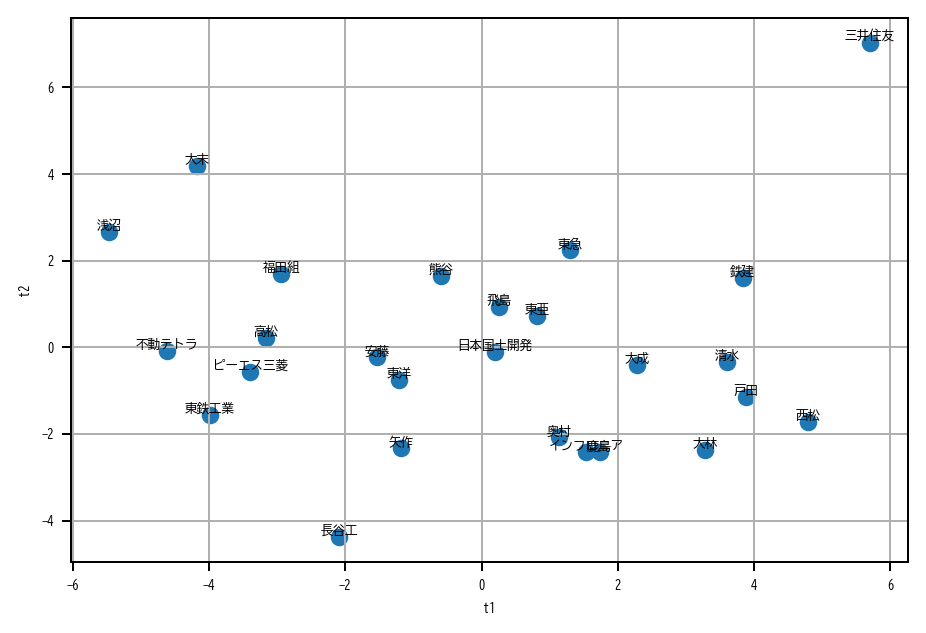

In [143]:
fig = plt.figure(dpi=180)
num = 26  # 可視化するデータ数を指定
plt.scatter(score3.iloc[:num,0], score3.iloc[:num,1]) 
plt.rcParams["font.size"] = 5
# プロットしたデータにサンプル名をラベリング
for i in range(num):
    plt.text(score3.iloc[i,0], score3.iloc[i,1], score3.index[i], horizontalalignment="center", verticalalignment="bottom")

plt.xlabel("t1")
plt.ylabel("t2")
plt.grid()
plt.show()

In [136]:
df_zaimu_rate.index

Index(['大成', '清水', '大林', '熊谷', '鹿島', '日本国土開発', '西松', '飛島', '鉄建', '東亜', '東洋',
       '奥村', '三井住友', '長谷工', '大末', '不動テトラ', '東鉄工業', '浅沼', '戸田', '矢作', '福田組',
       '高松', '東急', '安藤', 'ピーエス三菱', 'インフロニア'],
      dtype='object')

In [144]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_zaimu_rate)
X_scaled_rate = scaler.transform(df_zaimu_rate)

In [148]:
pca.explained_variance_ratio_

array([0.455, 0.288])

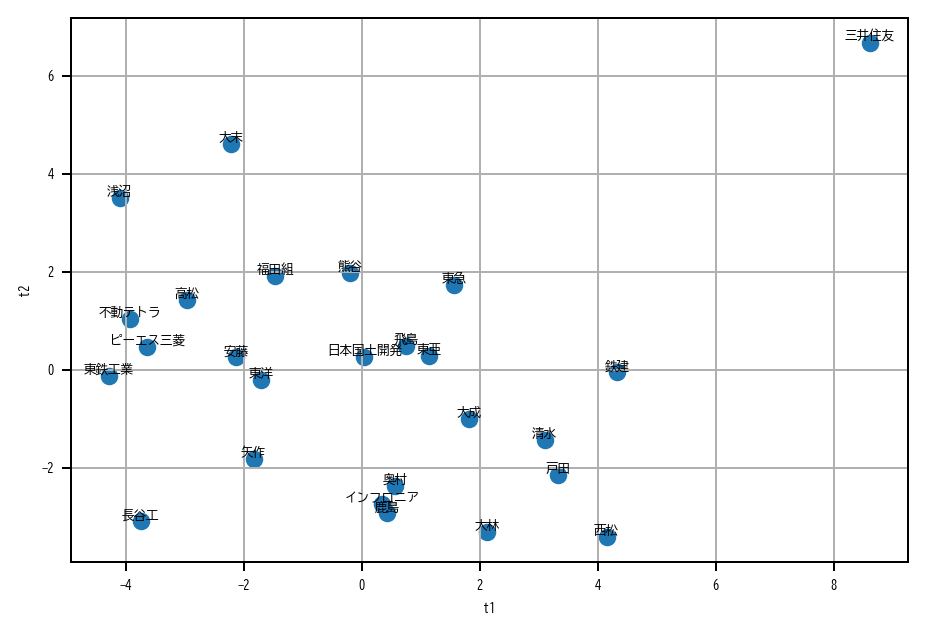

In [146]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled_rate)
X_pca2 = pca.transform(X_scaled_rate)
score = pd.DataFrame(pca.transform(X_scaled_rate), index=df_zaimu_rate.index)

import matplotlib
matplotlib.rc('font', family='BIZ UDGothic')
fig = plt.figure(dpi=180)
num = 26  # 可視化するデータ数を指定
plt.scatter(score.iloc[:num,0], score.iloc[:num,1]) 
plt.rcParams["font.size"] = 5
# プロットしたデータにサンプル名をラベリング
for i in range(num):
    plt.text(score.iloc[i,0], score.iloc[i,1], score.index[i], horizontalalignment="center", verticalalignment="bottom")

plt.xlabel("t1")
plt.ylabel("t2")
plt.grid()
plt.show()

In [149]:
pca.explained_variance_ratio_

array([0.455, 0.288])

In [150]:

df_pca = pd.DataFrame(pca.components_,
             columns = [df_zaimu_rate.columns],
             index = ["主成分{}".format(x+1) for x in range(2)]).T

In [151]:
df_pca.nlargest(10, '主成分1')

,主成分1,主成分2
固定比率,0.243451,-0.219198
負債回転期間,0.238939,-0.244951
固定長期適合率,0.212900,-0.273734
有形固定長期適合率,0.143342,-0.261285
一人あたり売上高,0.061260,-0.152049
純支払い利息比率,-0.070544,0.138673
固定資産回転率,-0.110154,0.336049
1人あたりの売上総利益,-0.142668,-0.288605
総資産回転率,-0.144176,0.327695
自己資本回転率,-0.144176,0.327695


In [153]:
df_pca.nsmallest(10, '主成分1')

,主成分1,主成分2
総資本経常利益率,-0.295703,-0.143131
売上高経常利益率,-0.295703,-0.143131
総資本売上総利益率,-0.287621,0.028562
ROA,-0.271682,-0.187307
自己資本比率,-0.260550,0.000631
流動比率,-0.253936,0.090932
売上高営業利益率,-0.249316,-0.246814
自己資本経常利益率,-0.241258,-0.224350
売上高総利益率,-0.238188,-0.207294
運転資本保有月数,-0.219537,0.012282


In [ ]:
scaler = StandardScaler()
scaler.fit(df5)
X_scaled = scaler.transform(df5)
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)


In [216]:
df_zaimu

,当期純利益,純資産,総資産・総資本,負債,自己資本比率,自己資本,売上高
大成,4.735600e+10,8.339440e+11,2.016717e+12,1.182773e+12,0.4110,8.288707e+11,1.642712e+12
清水,5.148900e+10,9.072770e+11,2.448010e+12,1.540732e+12,0.3480,8.519075e+11,1.933814e+12
大林,7.985800e+10,1.035881e+12,2.609929e+12,1.574048e+12,0.3820,9.969929e+11,1.983888e+12
熊谷,7.973000e+09,1.698600e+11,3.766500e+11,2.067890e+11,0.4510,1.698692e+11,4.035020e+11
鹿島,1.140650e+11,1.061145e+12,2.769718e+12,1.708572e+12,0.3800,1.052493e+12,2.391579e+12
日本国土開発,3.310000e+09,7.802900e+10,1.623390e+11,8.431000e+10,0.4800,7.792272e+10,1.542020e+11
西松,9.754000e+09,1.561480e+11,5.136230e+11,3.574750e+11,0.2900,1.489507e+11,3.397570e+11
飛島,3.038000e+09,4.573000e+10,1.280550e+11,8.232500e+10,0.3570,4.571564e+10,1.259410e+11
鉄建,2.367000e+09,6.554300e+10,1.833960e+11,1.178520e+11,0.3550,6.510558e+10,1.607430e+11
東亜,4.912000e+09,8.936100e+10,2.269280e+11,1.375670e+11,0.3910,8.872885e+10,2.135690e+11


In [16]:
df2.head(50)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249
要素ID,jpcrp_cor:NetSalesSummaryOfBusinessResults,jpcrp_cor:OrdinaryIncomeLossSummaryOfBusinessR...,jpcrp_cor:ProfitLossAttributableToOwnersOfPare...,jpcrp_cor:ComprehensiveIncomeSummaryOfBusiness...,jpcrp_cor:NetAssetsSummaryOfBusinessResults,jpcrp_cor:TotalAssetsSummaryOfBusinessResults,jpcrp_cor:NetAssetsPerShareSummaryOfBusinessRe...,jpcrp_cor:BasicEarningsLossPerShareSummaryOfBu...,jpcrp_cor:EquityToAssetRatioSummaryOfBusinessR...,jpcrp_cor:RateOfReturnOnEquitySummaryOfBusines...,jpcrp_cor:PriceEarningsRatioSummaryOfBusinessR...,jpcrp_cor:NetCashProvidedByUsedInOperatingActi...,jpcrp_cor:NetCashProvidedByUsedInInvestingActi...,jpcrp_cor:NetCashProvidedByUsedInFinancingActi...,jpcrp_cor:CashAndCashEquivalentsSummaryOfBusin...,jpcrp_cor:NumberOfEmployees,jpcrp_cor:OrdinaryIncomeLossSummaryOfBusinessR...,jpcrp_cor:NetIncomeLossSummaryOfBusinessResults,jpcrp_cor:CapitalStockSummaryOfBusinessResults,jpcrp_cor:TotalNumberOfIssuedSharesSummaryOfBu...,jpcrp_cor:NetAssetsSummaryOfBusinessResults,jpcrp_cor:TotalAssetsSummaryOfBusinessResults,jpcrp_cor:NetAssetsPerShareSummaryOfBusinessRe...,jpcrp_cor:DividendPaidPerShareSummaryOfBusines...,jpcrp_cor:InterimDividendPaidPerShareSummaryOf...,jpcrp_cor:BasicEarningsLossPerShareSummaryOfBu...,jpcrp_cor:EquityToAssetRatioSummaryOfBusinessR...,jpcrp_cor:RateOfReturnOnEquitySummaryOfBusines...,jpcrp_cor:PriceEarningsRatioSummaryOfBusinessR...,jpcrp_cor:PayoutRatioSummaryOfBusinessResults,jpcrp_cor:NumberOfEmployees,jpcrp_cor:TotalShareholderReturn,jpcrp_cor:TotalReturnOnSharePriceIndex,jpcrp_cor:AverageAgeYearsInformationAboutRepor...,jpcrp_cor:AverageLengthOfServiceYearsInformati...,jpcrp_cor:AverageAnnualSalaryInformationAboutR...,jpcrp_cor:NumberOfSharesConstitutingOneUnit,jpcrp_cor:NumberOfShareholdersNationalAndLocal...,jpcrp_cor:NumberOfShareholdersFinancialInstitu...,jpcrp_cor:NumberOfShareholdersFinancialService...,jpcrp_cor:NumberOfShareholdersOtherCorporations,jpcrp_cor:NumberOfShareholdersForeignInvestors...,jpcrp_cor:NumberOfShareholdersForeignIndividua...,jpcrp_cor:NumberOfShareholdersIndividualsAndOt...,jpcrp_cor:NumberOfShareholdersTotal,jpcrp_cor:NumberOfSharesHeldNumberOfUnitsNatio...,jpcrp_cor:NumberOfSharesHeldNumberOfUnitsFinan...,jpcrp_cor:NumberOfSharesHeldNumberOfUnitsFinan...,jpcrp_cor:NumberOfSharesHeldNumberOfUnitsOther...,jpcrp_cor:NumberOfSharesHeldNumberOfUnitsForei...,jpcrp_cor:NumberOfSharesHeldNumberOfUnitsForei...,jpcrp_cor:NumberOfSharesHeldNumberOfUnitsIndiv...,jpcrp_cor:NumberOfSharesHeldNumberOfUnitsTotal,jpcrp_cor:NumberOfSharesHeldSharesLessThanOneUnit,jpcrp_cor:PercentageOfShareholdingsNationalAnd...,jpcrp_cor:PercentageOfShareholdingsFinancialIn...,jpcrp_cor:PercentageOfShareholdingsFinancialSe...,jpcrp_cor:PercentageOfShareholdingsOtherCorpor...,jpcrp_cor:PercentageOfShareholdingsForeignersO...,jpcrp_cor:PercentageOfShareholdingsForeignIndi...,jpcrp_cor:PercentageOfShareholdingsIndividuals...,jpcrp_cor:NumberOfSharesHeld,jpcrp_cor:ShareholdingRatio,jpcrp_cor:NumberOfSharesHeld,jpcrp_cor:ShareholdingRatio,jpcrp_cor:NumberOfSharesHeld,jpcrp_cor:ShareholdingRatio,jpcrp_cor:Number

In [19]:
df1['項目名'].value_counts()

純資産                                               11
発行済株式（自己株式を除く。）の総数に対する所有株式数の割合                    11
所有株式数                                             11
当期変動額合計                                           11
株式数（株）、発行済株式、議決権の状況                                6
株主資本以外の項目の当期変動額（純額）                                5
剰余金の配当                                             4
議決権の数（個）、発行済株式、議決権の状況                              3
当期純利益又は当期純損失（△）（平成26年3月28日財規等改正後）                  3
親会社株主に帰属する当期純利益又は親会社株主に帰属する当期純損失（△）                3
株価収益率、経営指標等                                        2
受取利息、営業外収益                                         2
受取配当金、営業外収益                                        2
その他、流動資産                                           2
現金及び預金                                             2
営業外収益                                              2
支払利息、営業外費用                                         2
営業外費用                                              2
経常利益又は経常損失（△）                                 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit()

In [ ]:
list_huka = df_pca.nlargest(10, '主成分1').reset_index().set_index('項目名').index + df_pca.nsmallest(10, '主成分2').reset_index().set_index('項目名').index